In [2]:
from HeaderP import *
import Astraea
from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice
import random

In [17]:
df_NN_MS=pd.read_pickle('NewData/ProtVP_MS_150_w015_NN.pkl')
df_NN_giant=pd.read_pickle('NewData/ProtVP_Giant_w015_NN.pkl')

df_bin_MS=pd.read_pickle('NewData/ProtVP_MS_150_w015_bin.pkl')
df_bin_MS['age_MAD']=df_bin_MS['age']
df_bin_MS['age_MAD_err']=df_bin_MS['age_err']
print(np.shape(df_bin_MS))
df_bin_MS=df_bin_MS.dropna(subset=['age','age_err'])
print(np.shape(df_bin_MS))
print(np.median(df_bin_MS['age_MAD_err']/df_bin_MS['age_MAD']))
df_bin_giant=pd.read_pickle('NewData/ProtVP_Giant_w015_bin.pkl')

ASstars=pd.read_table('/Users/lucy/Desktop/KeplerAges/ASage.webarchive',delimiter=',',skiprows=2)
ASstars=ASstars.dropna(subset=['KIC'])
ASstars

Clusters_cm=pd.merge(ASstars,df_bin_MS,left_on='KIC',right_on='KID',how='inner')
Clusters_cm


(21370, 170)
(21359, 170)
0.16445755821306957


Pipe         KIC  Mass_x     Rad  log(g)     Age     Lum       rho  \
0       AST      3735871.0  1.1112  1.1014  4.3995  1.8414  1.5230  1.171100   
1       BASTA    3735871.0  1.0890  1.0957  4.3956  2.3457  1.5040  1.169009   
2       C2kSMO   3735871.0  1.0757  1.0858  4.3979  1.4544  1.4300  1.183600   
3       GOE      3735871.0  1.1057  1.0978  4.4004  1.6456  1.5186  1.177094   
4   V&amp;A      3735871.0  1.1050  1.0990  4.3992  1.7710  1.4540  1.172499   
5       YMCM     3735871.0  1.1316  1.1084  4.4017  1.9465  0.1854  1.169900   
6       AST      8179536.0  1.1977  1.3396  4.2619  2.7851  2.6220  0.701500   
7       BASTA    8179536.0  1.1593  1.3266  4.2548  3.5434  2.5710  0.697301   
8       C2kSMO   8179536.0  1.2597  1.3520  4.2760  1.7632  2.5720  0.718000   
9       GOE      8179536.0  1.2280  1.3471  4.2682  1.6766  2.6600  0.707618   
10  V&amp;A      8179536.0  1.2580  1.3520  4.2742  1.7090  2.6400  0.717868   
11      YMCM     8179536.0  1.2346  1.3542  4.2656  2.6906  0.4276  0.699830   
12      AST      9139151.0  1.1483  1.1499  4.3763  2.4324  1.8510  1.063400   
13      BASTA    9139151.0  1.1783  1.1526  4.3824  1.3236  1.8550  1.075444   
14      C2kSMO   9139151.0  1.2167  1.1695  4.3869  1.3428  1.8570  1.071600   
15      GOE      9139151.0  1.1434  1.1451  4.3784  1.9517  1.8441  1.072619   
16  V&amp;A      9139151.0  1.1080  1.1340  4.3732  1.7640  1.8000  1.070850   
17      YMCM     9139151.0  1.1926  1.1650  4.3813  2.3401  0.2791  1.061800   
18      AST     10644253.0  1.1371  1.1100  4.4027  1.1767  1.4850  1.170800   
19      BASTA   10644253.0  1.0985  1.0987  4.3956  2.3936  1.4530  1.164403   
20      C2kSMO  10644253.0  1.1726  1.1209  4.4078  0.9427  1.4810  1.172900   
21      GOE     10644253.0  1.1340  1.1089  4.4027  1.1384  1.4315  1.171447   
22  V&amp;A     10644253.0  1.1180  1.1050  4.4008  1.0080  1.4710  1.171950   
23      YMCM    10644253.0  1.1748  1.1221  4.4074  1.0644  0.1791  1.170600   
24      AST     11081729.0  1.3153  1.4359  4.2423  1.9282  3.3950  0.625600   
25      BASTA   11081729.0  1.2980  1.4226  4.2449  1.8825  3.2770  0.635920   
26      C2kSMO  11081729.0  1.3227  1.4172  4.2563  0.8216  3.3680  0.654600   
27      GOE     11081729.0  1.4985  1.4852  4.2700  0.8329  3.8699  0.644329   
28  V&amp;A     11081729.0  1.2560  1.4150  4.2345  2.1670  3.0990  0.622740   
29      YMCM    11081729.0  1.3383  1.4428  4.2455  1.8389  0.5358  0.627190   

      Dist    Xini  ...     dv_STD  dv_MAD_err   age_STD         vd    vd_err  \
0   124.05  0.7070  ...  11.926365    0.006903  3.027931  10.138635  0.511040   
1   123.40  0.7080  ...  11.926365    0.006903  3.027931  10.138635  0.511040   
2   122.29  0.6920  ...  11.926365    0.006903  3.027931  10.138635  0.511040   
3   123.64  0.7105  ...  11.926365    0.006903  3.027931  10.138635  0.511040   
4   123.77  0.7090  ...  11.926365    0.006903  3.027931  10.138635  0.511040   
5   124.84  0.7210  ...  11.926365    0.006903  3.027931  10.138635  0.511040   
6   139.50  0.7080  ...  12.936018    0.048344  3.452602  10.649121  0.664341   
7   138.14  0.7170  ...  12.936018    0.048344  3.452602  10.649121  0.664341   
8   140.81  0.7200  ...  12.936018    0.048344  3.452602  10.649121  0.664341   
9   140.29  0.6569  ...  12.936018    0.048344  3.452602  10.649121  0.664341   
10  140.81  0.7150  ...  12.936018    0.048344  3.452602  10.649121  0.664341   
11  141.03  0.7195  ...  12.936018    0.048344  3.452602  10.649121  0.664341   
12  101.18  0.7020  ...  12.287065    0.014414  3.182501  10.782276  0.328386   
13  101.43  0.7080  ...  12.287065    0.014414  3.182501  10.782276  0.328386   
14  102.91  0.7100  ...  12.287065    0.014414  3.182501  10.782276  0.328386   
15  100.76  0.7116  ...  12.287065    0.014414  3.182501  10.782276  0.328386   
16   99.78  0.6650  ...  12.287065    0.014414  3.182501  10.782276  0.328386   
17  102.51  0.7180  ...  12.287065    0.014414  3.182501  10.782276  0.

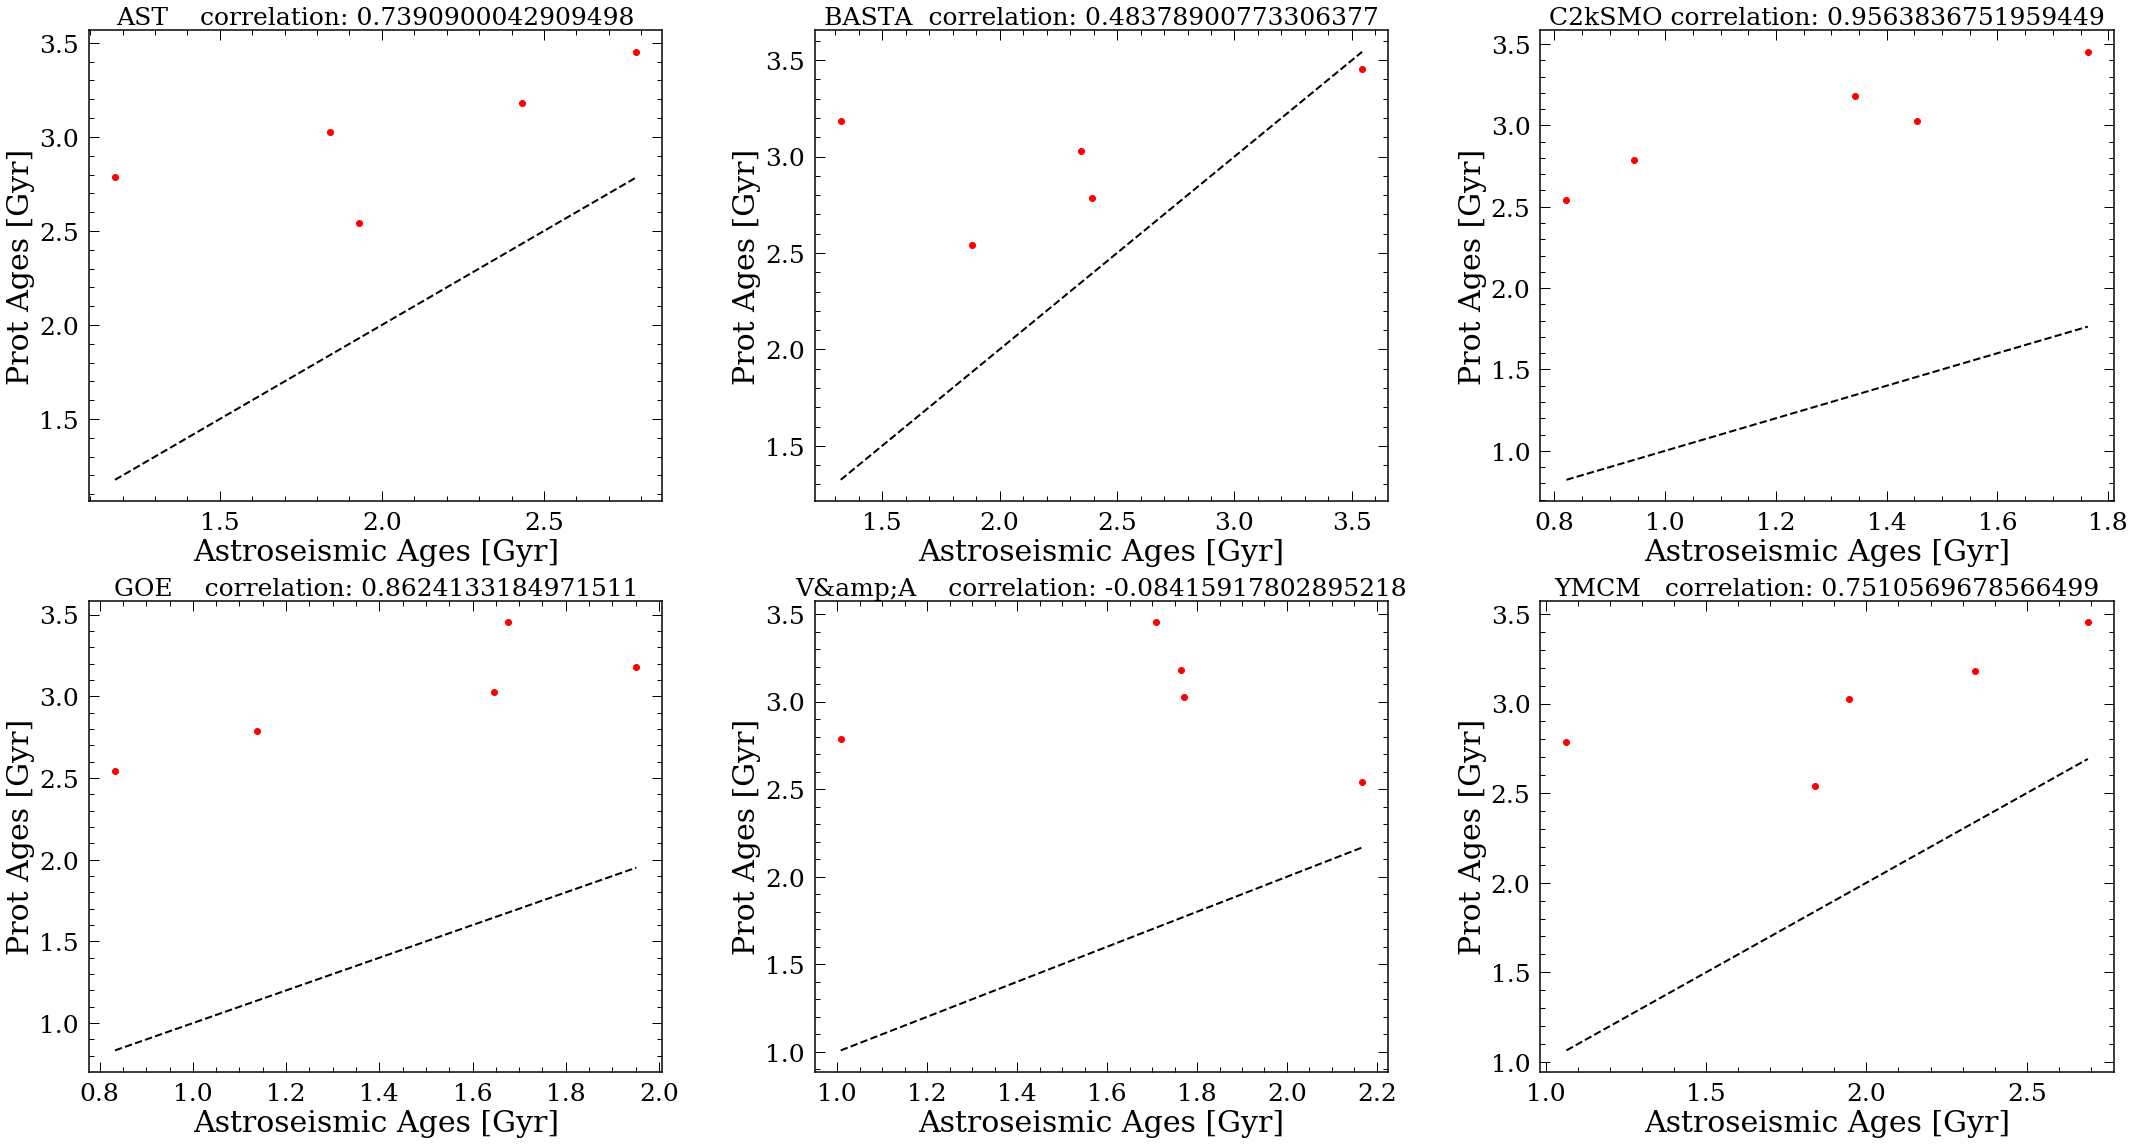

In [18]:
plt.figure(figsize=(30,16))
pcount=1
for pip in Clusters_cm['Pipe'].unique():
    plt.subplot(2,3,pcount)
    plotCM=Clusters_cm.loc[Clusters_cm['Pipe']==pip]
    plt.plot(plotCM["Age"],plotCM["age_STD"],'ro')
    plt.plot([min(plotCM["Age"]),max(plotCM["Age"])],[min(plotCM["Age"]),max(plotCM["Age"])],'k--')
    
    plt.xlabel('Astroseismic Ages [Gyr]')
    plt.ylabel('Prot Ages [Gyr]')
    r = np.corrcoef(plotCM["Age"], plotCM["age_STD"])
    plt.title(pip+' correlation: '+str(r[1][0]),fontsize=25)
    pcount=pcount+1
plt.tight_layout()
#plt.savefig('checkage.png')

# plot against AGOGEE abundances

In [19]:
APOGEE=pd.read_pickle('/Users/lucy/Desktop/ASTR/Columbia/GalacticArch/APOGEE.pkl')


In [20]:
cols=[i for i in APOGEE.columns if '_FE' in i]
cols=[i for i in cols if '_FEH' not in i]
cols=[i for i in cols if '_ERR' not in i]
cols=[i for i in cols if '_FLAG' not in i]
cols

['C_FE',
 'CI_FE',
 'N_FE',
 'O_FE',
 'NA_FE',
 'MG_FE',
 'AL_FE',
 'SI_FE',
 'P_FE',
 'S_FE',
 'K_FE',
 'CA_FE',
 'TI_FE',
 'TIII_FE',
 'V_FE',
 'CR_FE',
 'MN_FE',
 'CO_FE',
 'NI_FE',
 'CU_FE',
 'GE_FE',
 'RB_FE',
 'CE_FE',
 'ND_FE',
 'YB_FE']

In [21]:
df_NN_MS=pd.merge(APOGEE,df_NN_MS,left_on='GAIA_SOURCE_ID',right_on='source_id',how='inner')
df_NN_giant=pd.merge(APOGEE,df_NN_giant,left_on='GAIA_SOURCE_ID',right_on='source_id',how='inner')

df_bin_MS=pd.merge(APOGEE,df_bin_MS,left_on='GAIA_SOURCE_ID',right_on='source_id',how='inner')
df_bin_giant=pd.merge(APOGEE,df_bin_giant,left_on='GAIA_SOURCE_ID',right_on='source_id',how='inner')

df_NN_MS=df_NN_MS.loc[df_NN_MS['FE_H']>-5000]
df_bin_MS=df_bin_MS.loc[df_bin_MS['FE_H']>-5000]

abund=['C_FE','O_FE','NA_FE','MG_FE','AL_FE','SI_FE','S_FE','CA_FE','SC_FE','TI_FE',
      'V_FE','CR_FE','MN_FE','CO_FE','NI_FE','CU_FE','ZN_FE','SR_FE','Y_FE','ZR_FE',
      'BA_FE','LA_FE','CE_FE','PR_FE','ND_FE','SM_FE','EU_FE','GD_FE','DY_FE']

In [22]:
print(len(df_NN_MS),len(df_NN_giant),len(df_bin_MS),len(df_bin_giant))

328 480 328 480


-0.016087912023067474


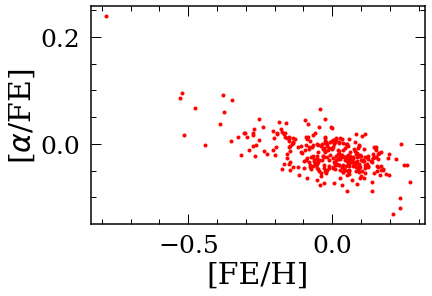

In [23]:
# alpha/Fe
plt.plot(figsize=(10,8))
plt.plot(df_bin_MS['FE_H'],df_bin_MS['ALPHA_M'],'r.')
plt.ylabel('[$\\alpha$/FE]')
plt.xlabel('[FE/H]')
print(np.mean(df_bin_MS['FE_H']))

328


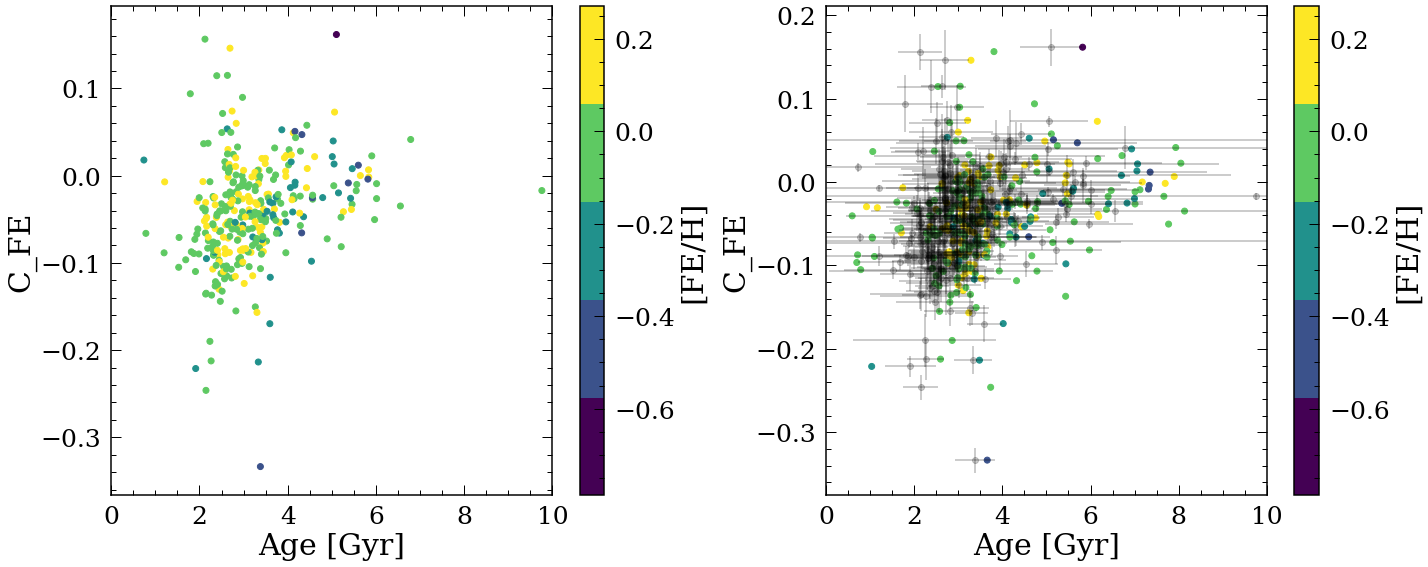

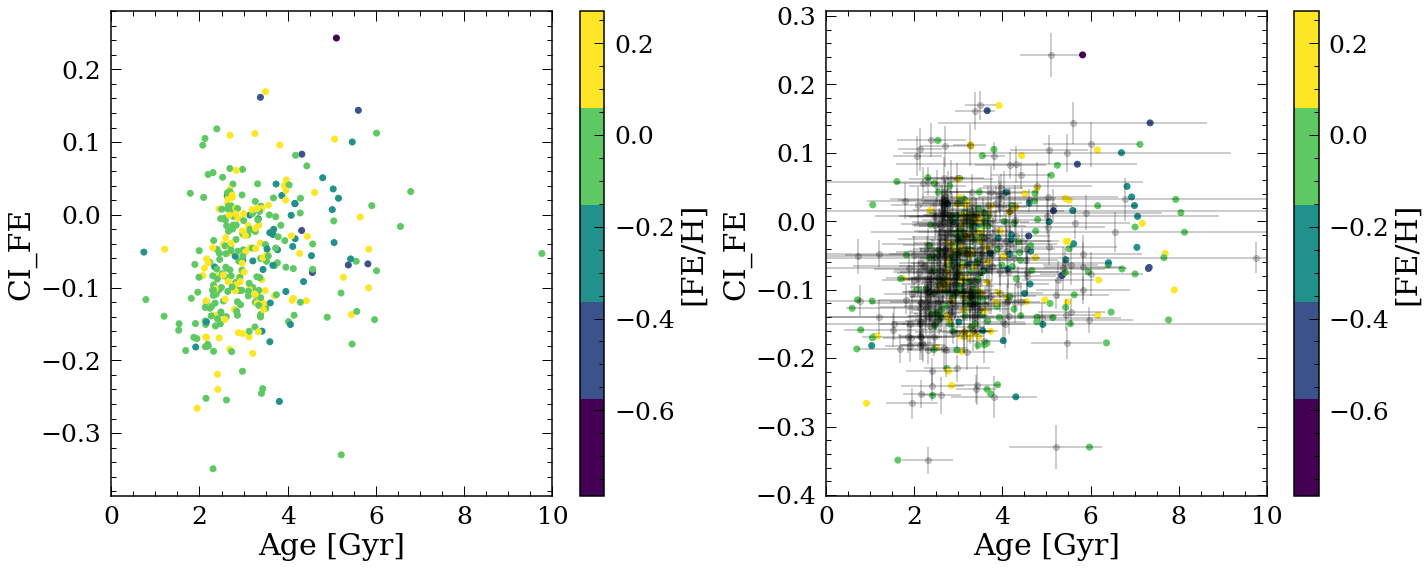

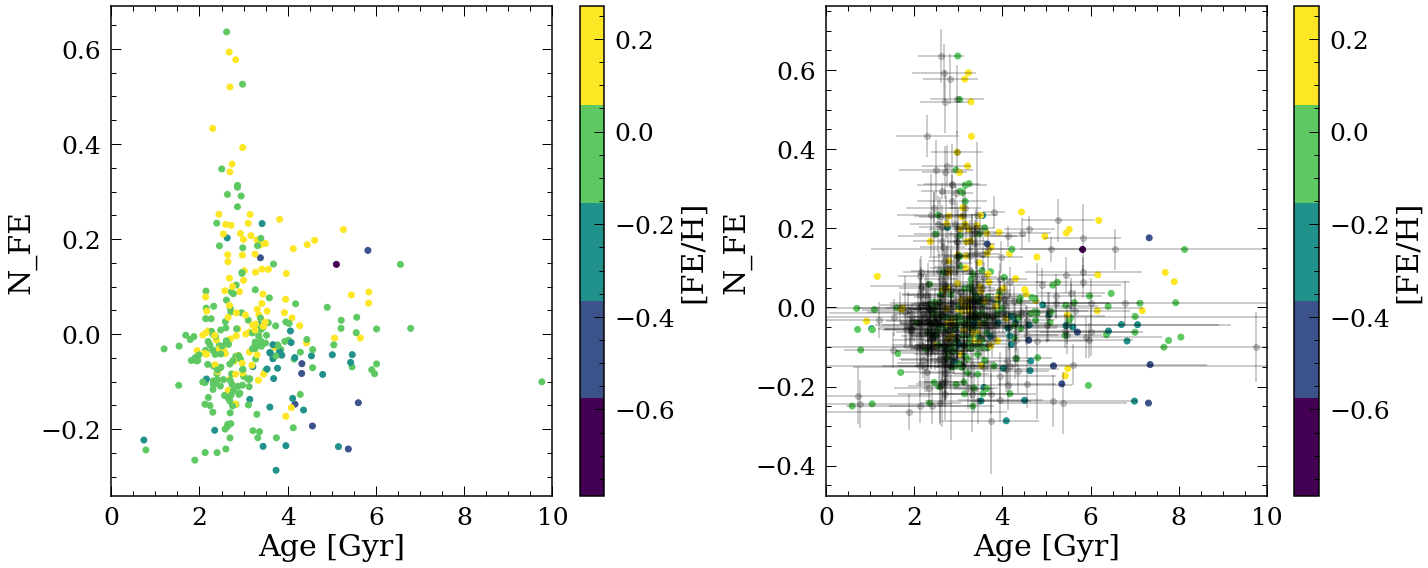

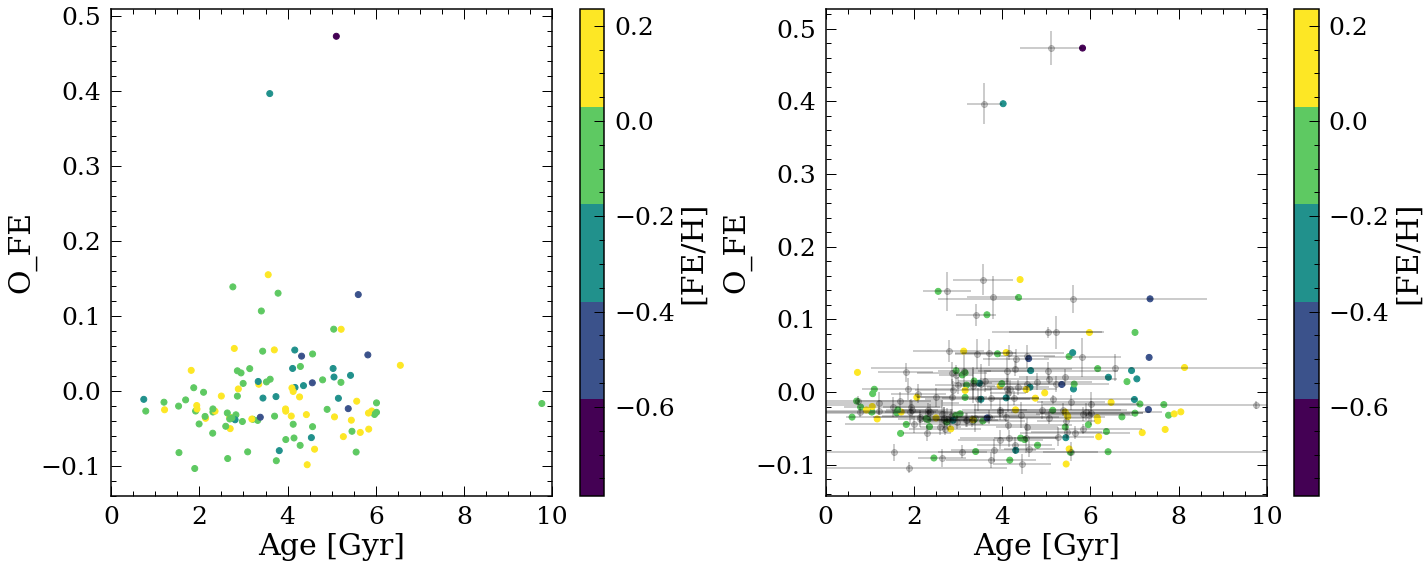

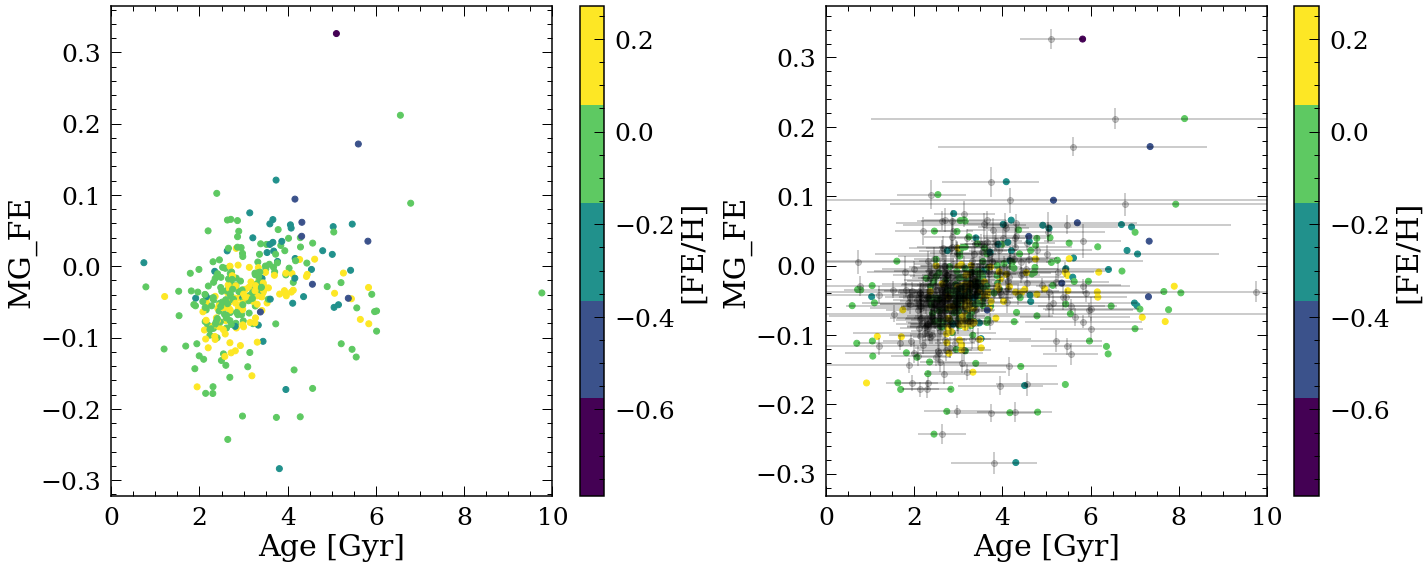

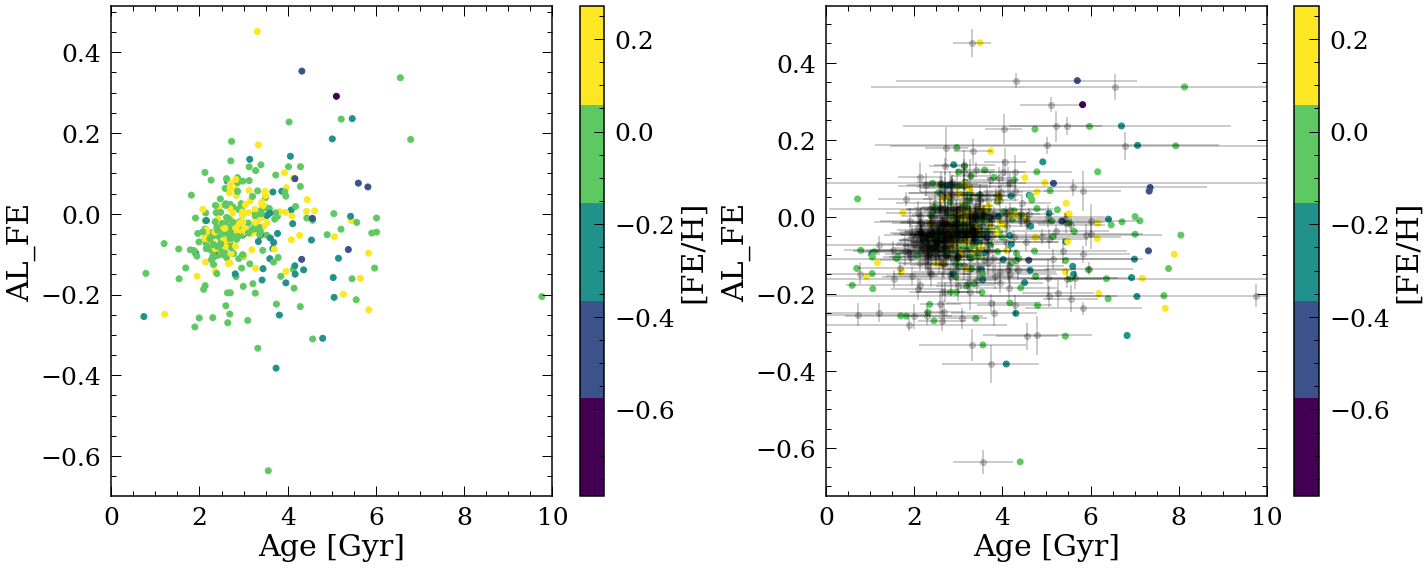

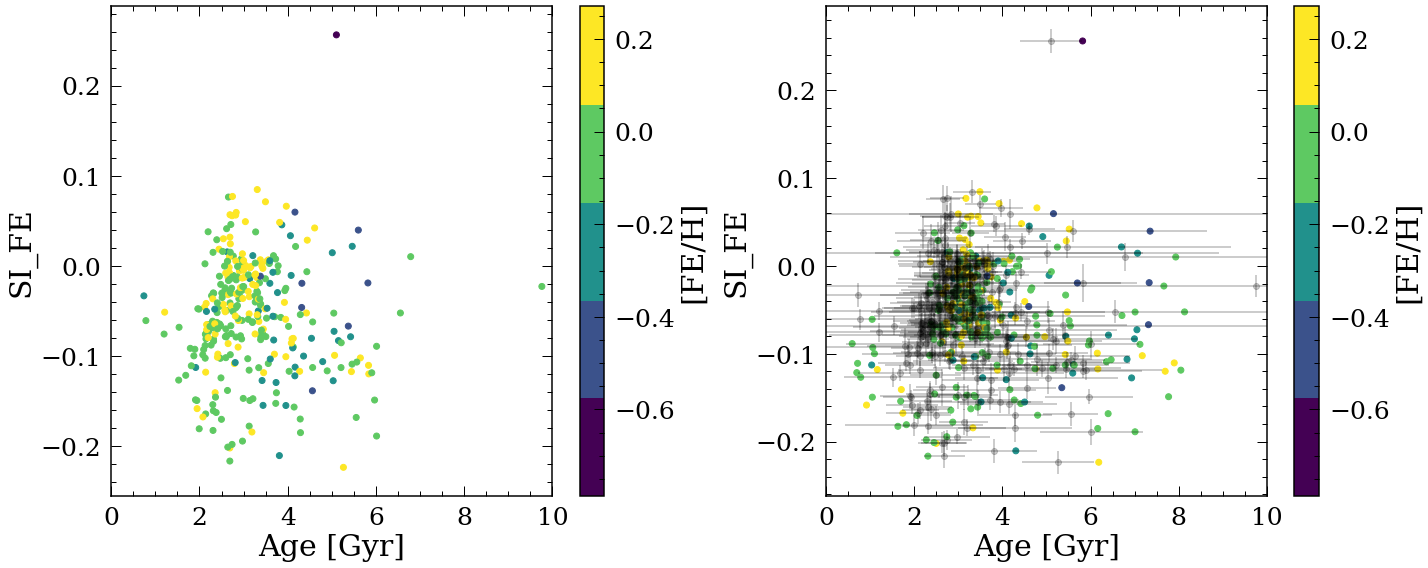

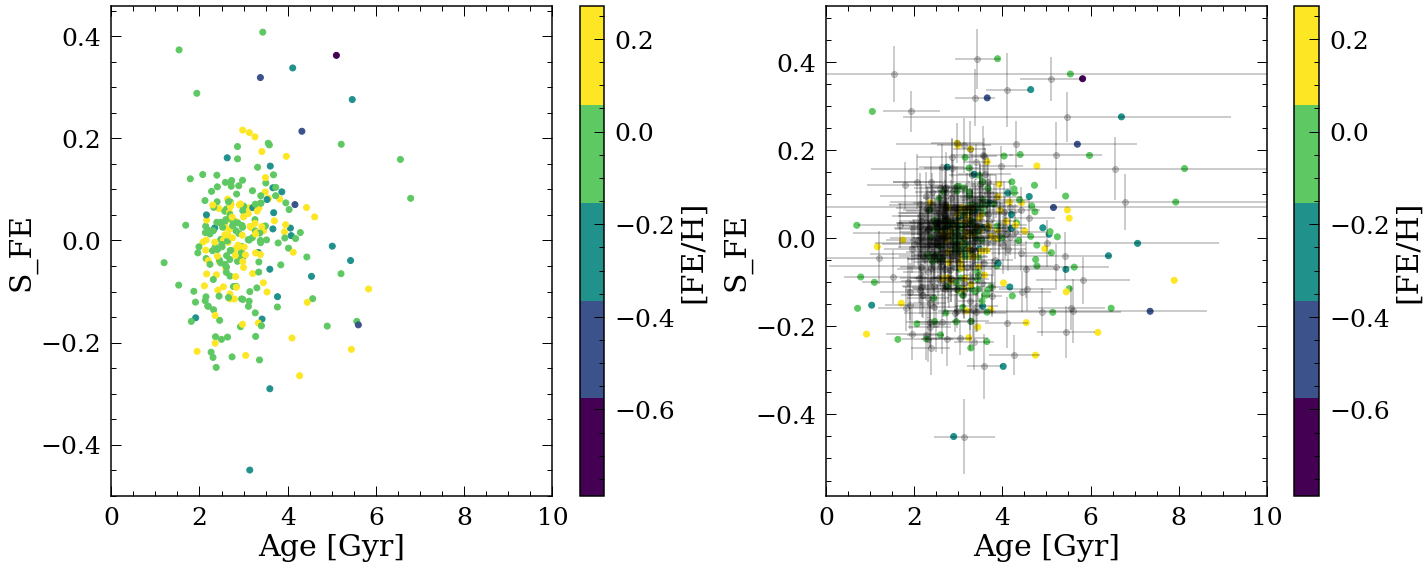

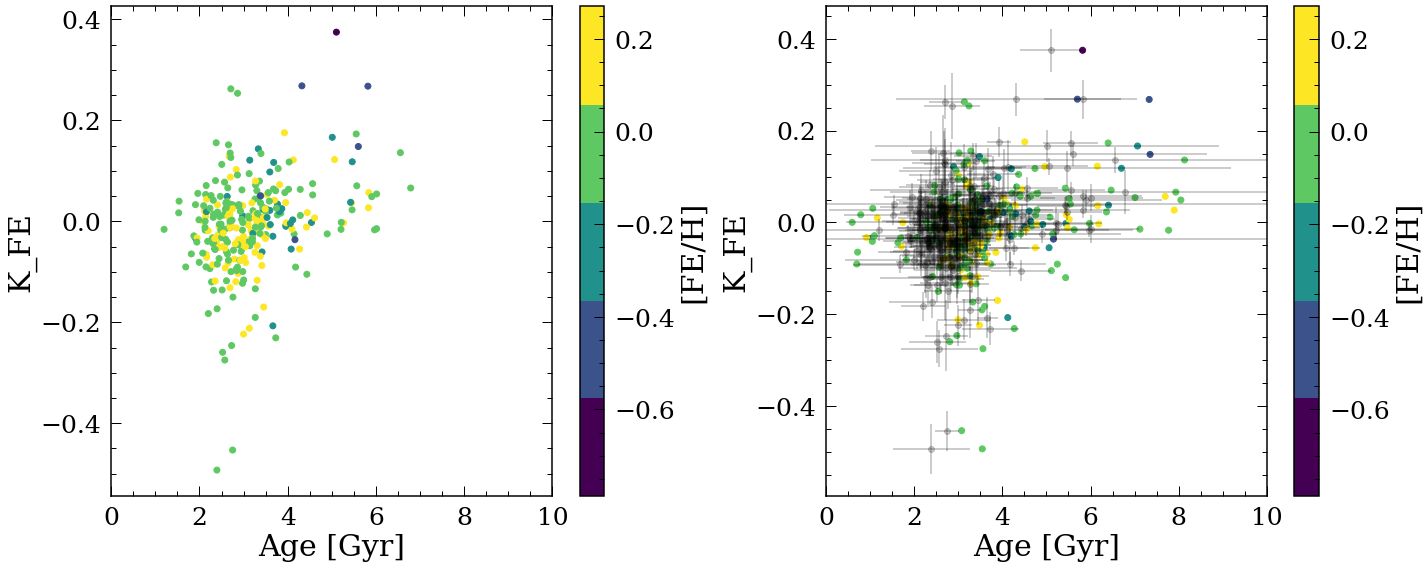

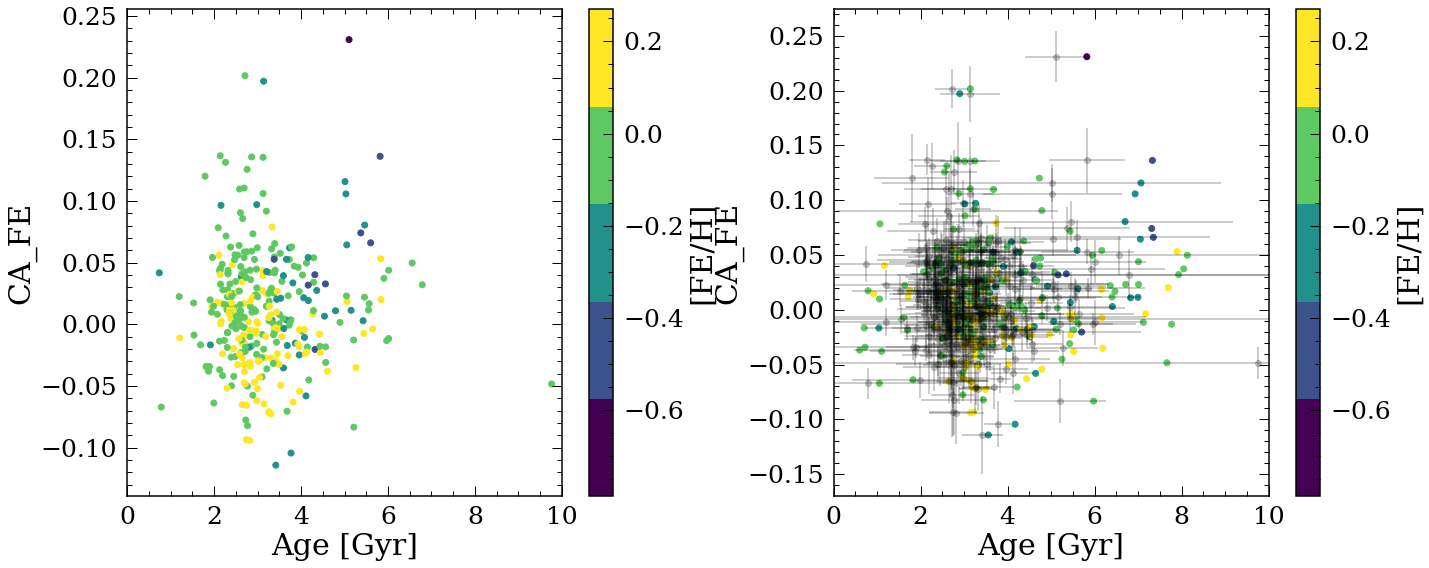

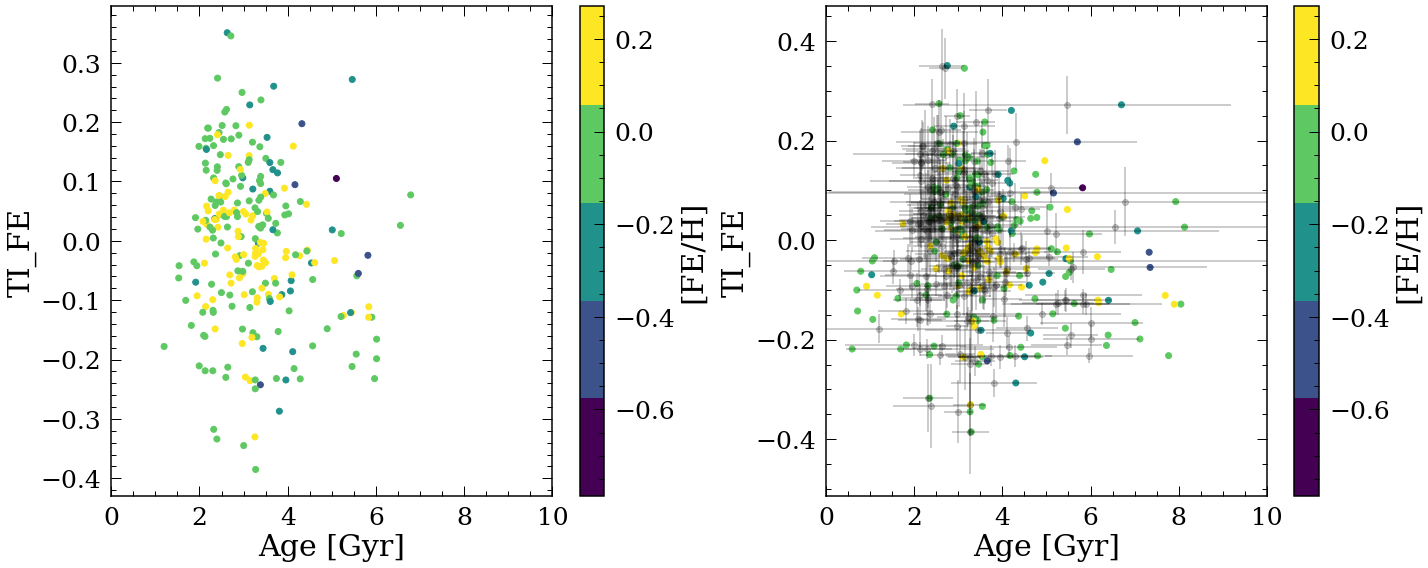

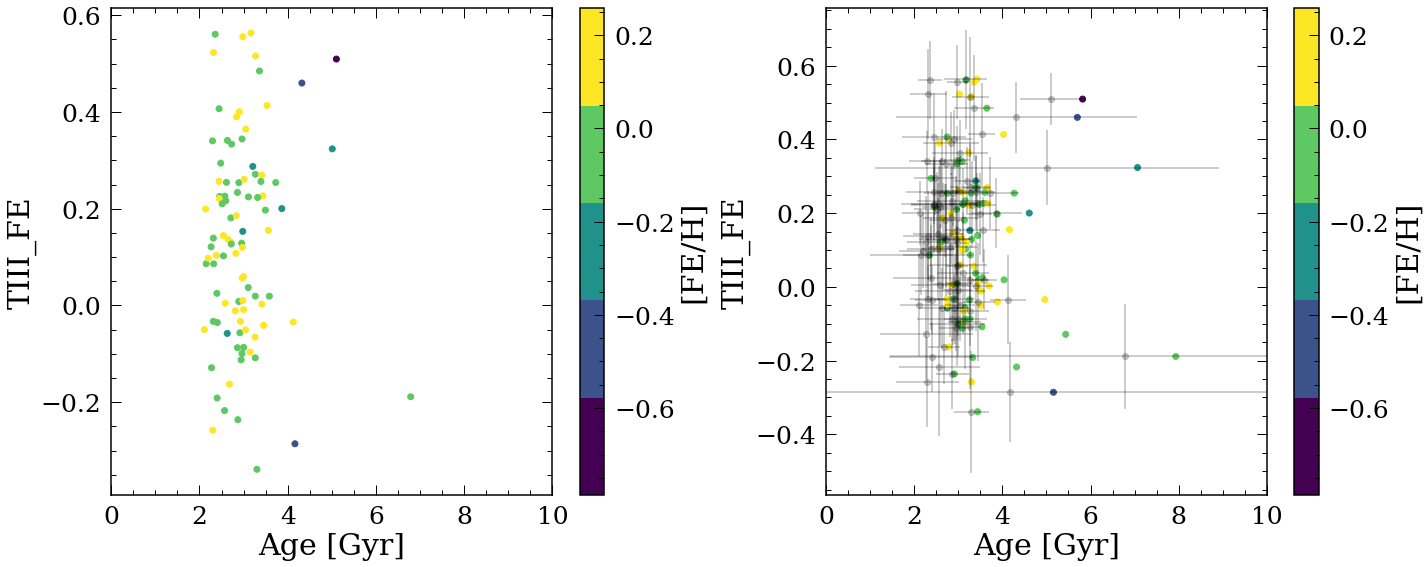

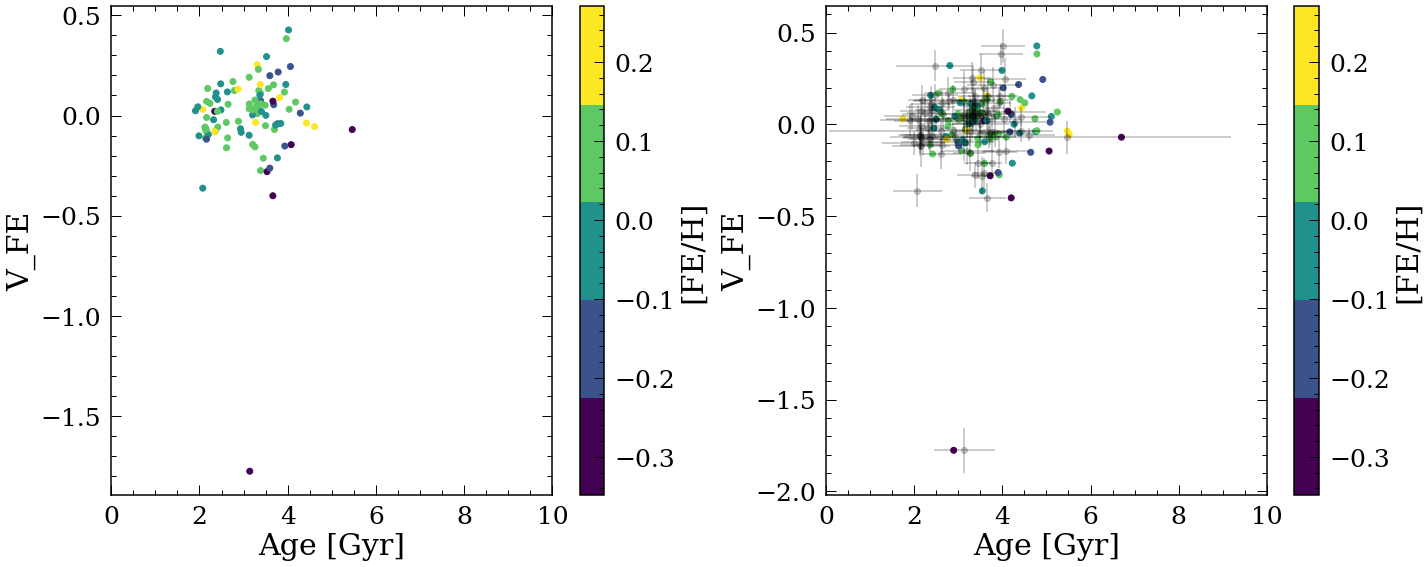

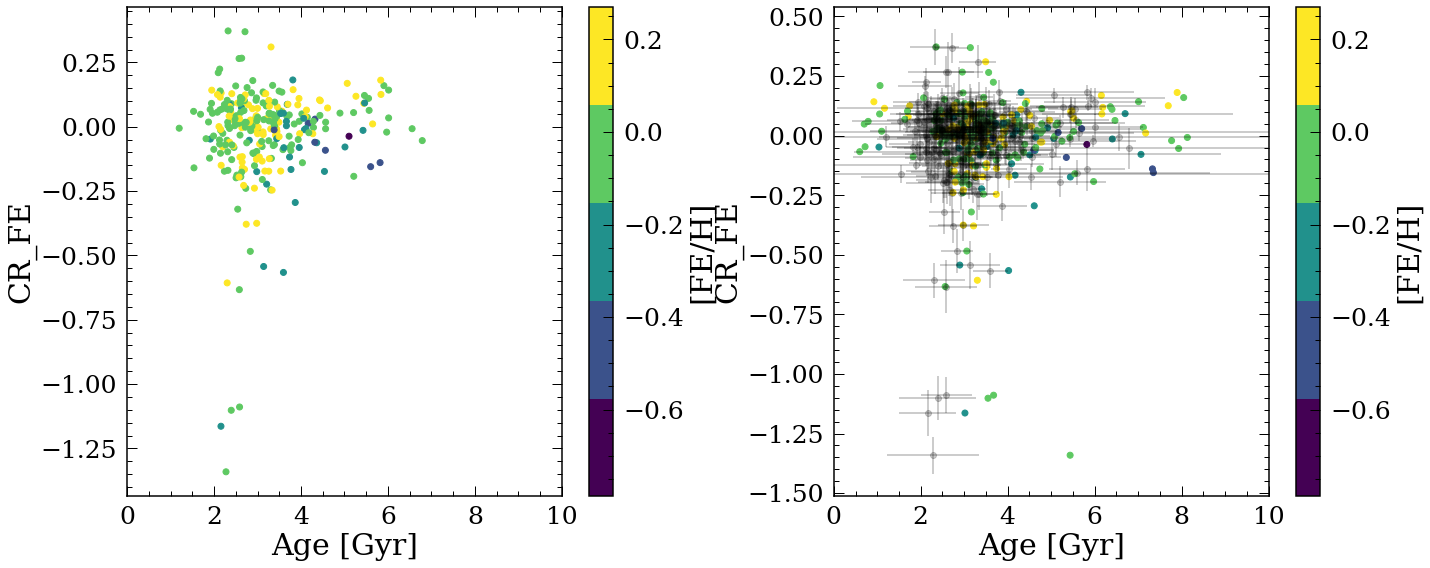

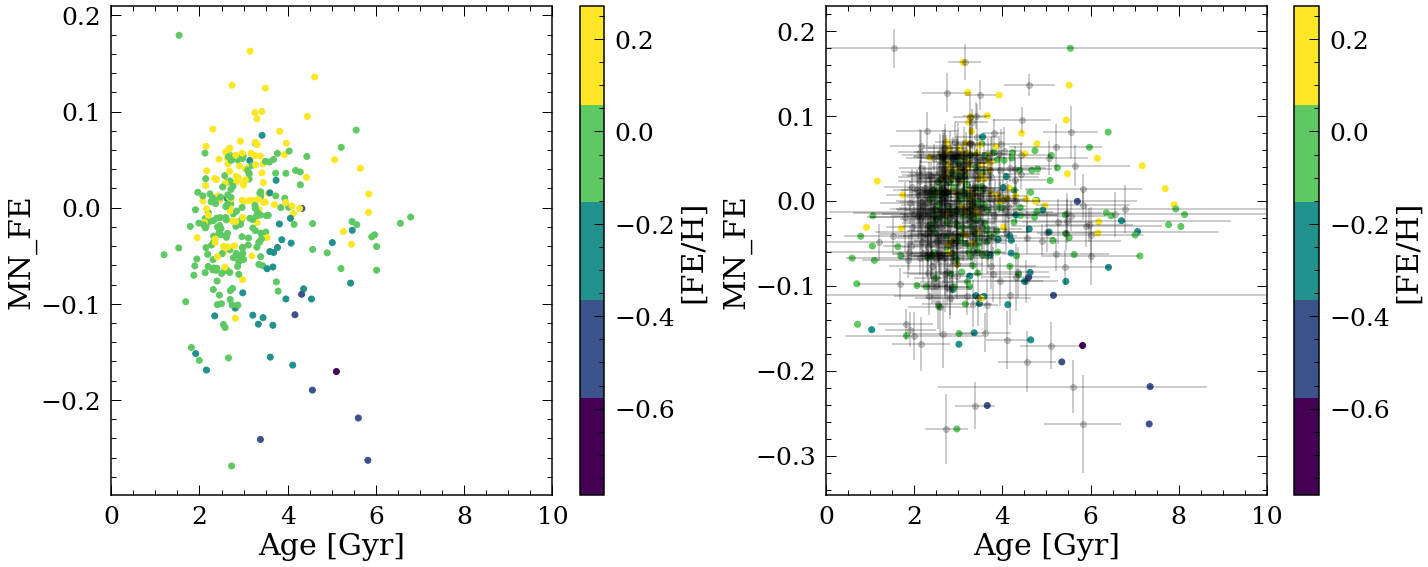

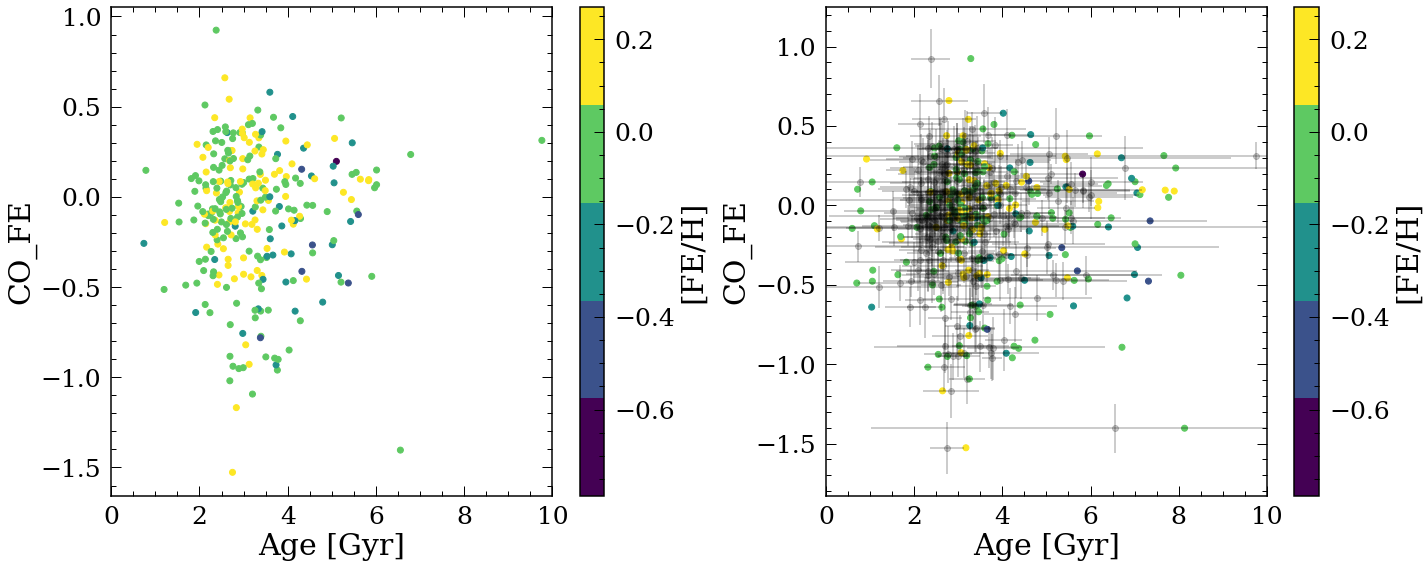

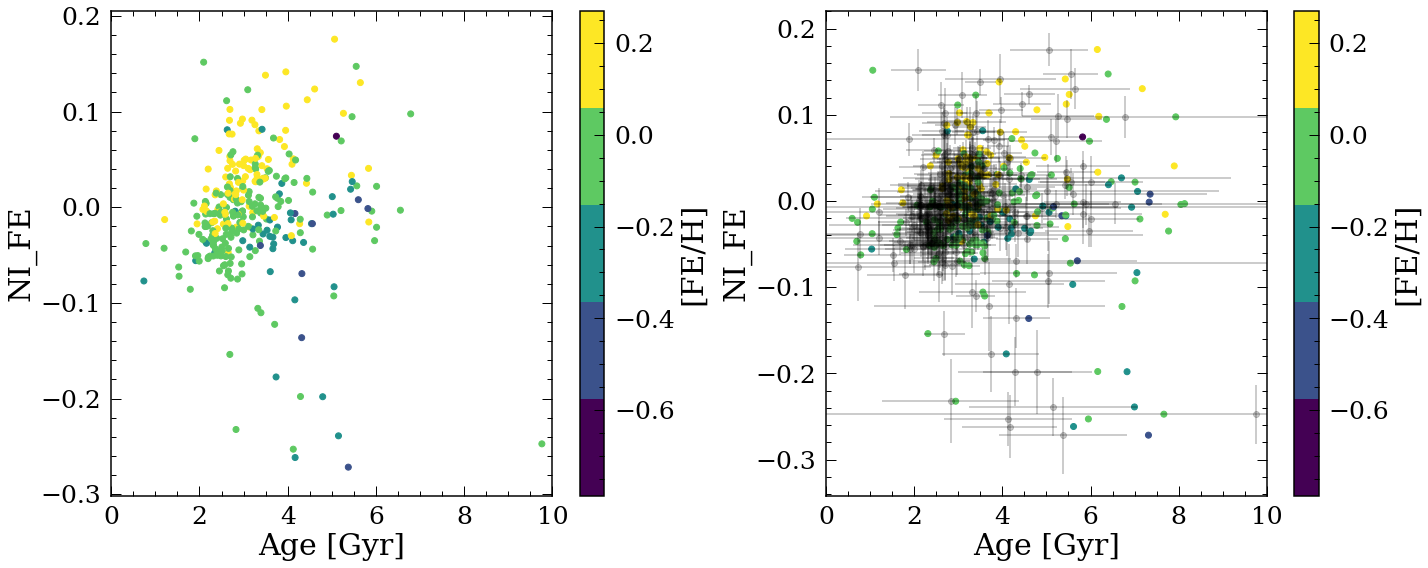

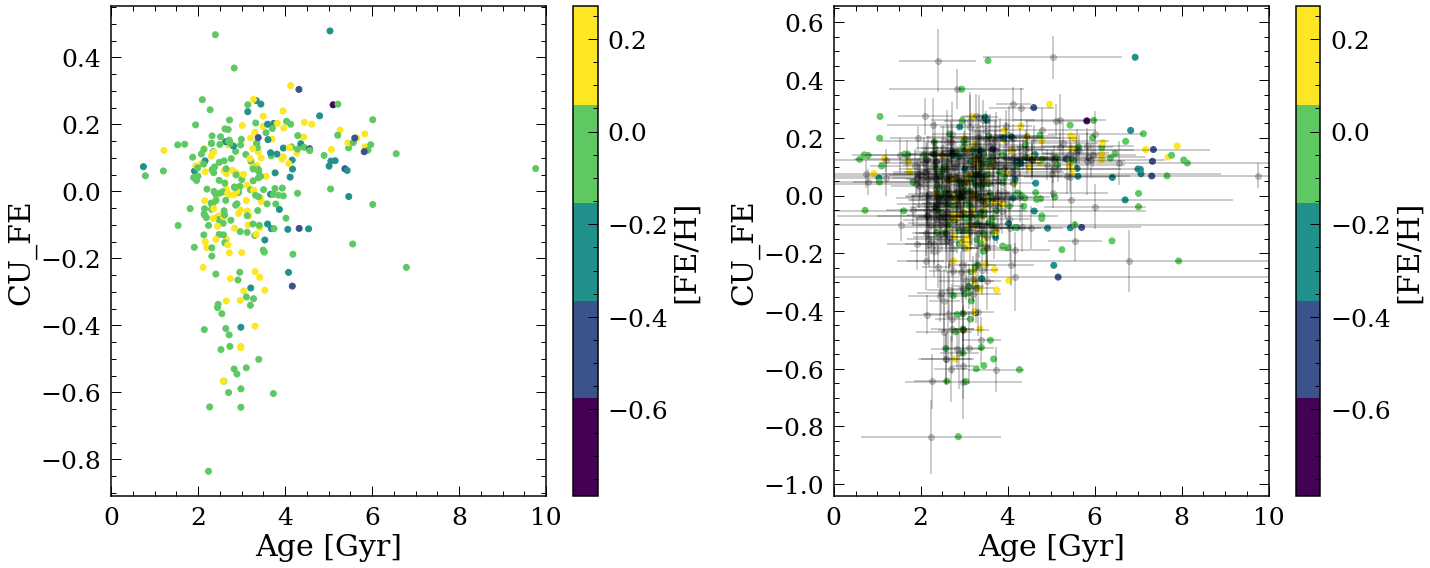

In [24]:
cm = plt.cm.get_cmap('viridis',5)
print(len(df_bin_MS))
for i in range(len(cols)):
    checkabd=cols[i]
    df_plot=df_bin_MS.loc[df_bin_MS[checkabd]>-100]
    if len(df_plot)>10:
        plt.figure(figsize=(20,8))
        plt.subplot(1,2,1)
        plt.scatter(df_plot['age_MAD'],df_plot[checkabd],c=df_plot['FE_H'],cmap=cm)
        plt.ylabel(checkabd)
        plt.xlim([0,10])
        plt.xlabel('Age [Gyr]')
        cb=plt.colorbar()
        cb.set_label('[FE/H]')
        
        plt.subplot(1,2,2)
        plt.errorbar(df_plot['age_MAD'],df_plot[checkabd],
                 yerr=df_plot[checkabd+"_ERR"],xerr=df_plot["age_MAD_err"],fmt='ko',alpha=0.2)
        plt.scatter(df_plot['age_STD'],df_plot[checkabd],c=df_plot['FE_H'],cmap=cm)
        plt.ylabel(checkabd)
        plt.xlim([0,10])
        plt.xlabel('Age [Gyr]')
        cb=plt.colorbar()
        cb.set_label('[FE/H]')
        
        plt.tight_layout()
        plt.savefig('NewData/Abund/'+checkabd+'_MS.png')
        #plt.xlim([-0.5,0.5])

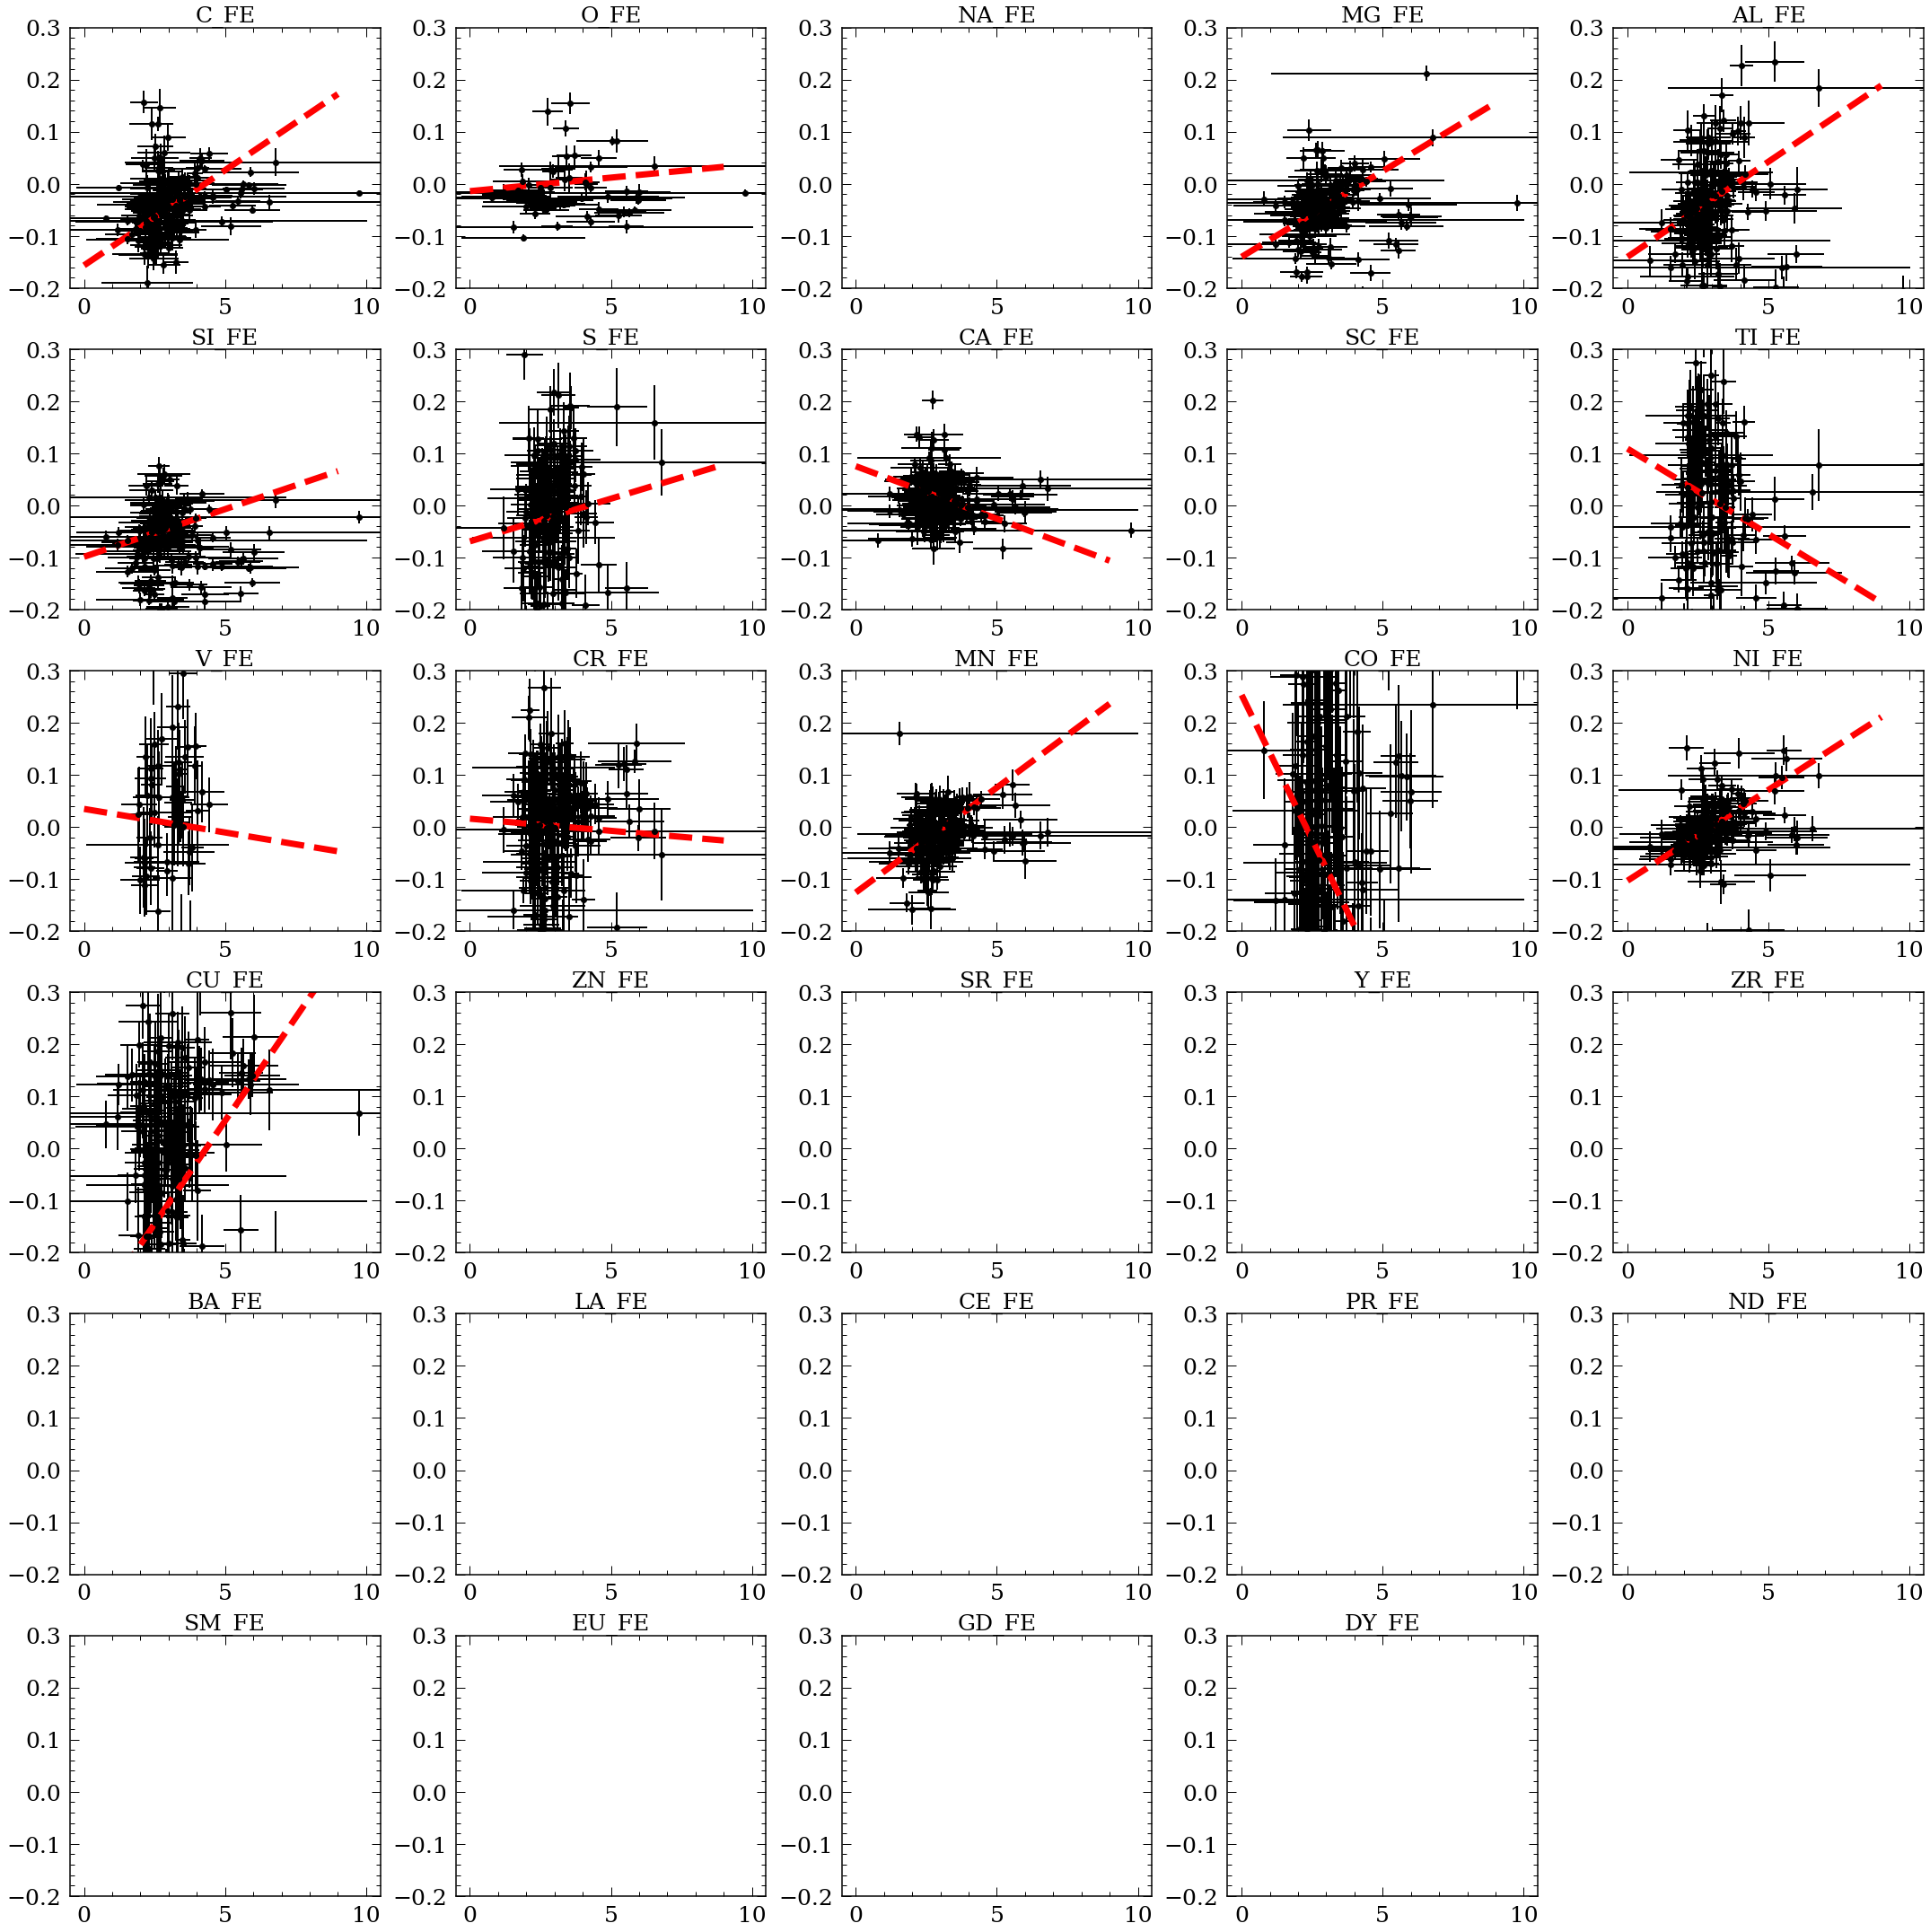

In [25]:
plt.figure(figsize=(30,30))
df_st=df_bin_MS.loc[abs(df_bin_MS['FE_H'])<=0.1]
#df_st=df_st.loc[abs(df_st['teff_calc']-5778)<=100]
#df_st=df_st.loc[abs(df_st['LOGG']-4.43)<=0.1]

for i in range(len(abund)):
    plt.subplot(6,5,i+1)
    if abund[i] in cols:
        df_plot=df_st.loc[df_st[abund[i]]>-100]
        
        if len(df_plot)>10:
        
            z = np.polyfit(df_plot['age_MAD'], df_plot[abund[i]], 
                           1,w=(1./(np.power(df_plot[abund[i]+"_ERR"],2)+np.power(df_plot['age_MAD_err'],2))))
            p = np.poly1d(z)
        
            
            plt.errorbar(df_plot['age_MAD'],df_plot[abund[i]],
                         yerr=df_plot[abund[i]+"_ERR"],xerr=df_plot["age_MAD_err"],fmt='ko')
            
            """
            plt.errorbar(df_plot['age_MAD'],df_plot[abund[i]],
                         yerr=df_plot[abund[i]+"_ERR"],fmt='ko')
            """
            plt.plot(range(10),p(range(10)),'r--',linewidth=7)
    plt.ylim([-0.2,0.3])
    plt.xlim([-0.5,10.5])
    plt.title(abund[i],fontsize=25)
plt.tight_layout()
plt.savefig('Abundances_werr.png')

In [26]:
df_st.to_pickle('Figures/solartwins.pkl')

## KOIs

In [27]:
KOIdata_ep=pd.read_table('/Users/lucy/Desktop/SecondProj/KOI.csv',delimiter=',',skiprows=53)

In [30]:
df_NN_MS_KOI=pd.merge(KOIdata_ep,df_bin_MS,left_on='kepid',right_on='KID',how='inner')
df_NN_MS_KOI

kepid_x kepoi_name kepler_name koi_disposition koi_pdisposition  \
0    3129238  K07645.01         NaN       CANDIDATE        CANDIDATE   
1    1865864  K04926.01         NaN       CANDIDATE        CANDIDATE   
2    3441795  K04981.01         NaN       CANDIDATE        CANDIDATE   
3    3647097  K05001.01         NaN       CANDIDATE        CANDIDATE   
4    3852865  K05017.01         NaN  FALSE POSITIVE   FALSE POSITIVE   
5    9274092  K05649.01         NaN       CANDIDATE        CANDIDATE   
6    9575728  K05692.01         NaN       CANDIDATE        CANDIDATE   
7    9659022  K05702.01         NaN       CANDIDATE        CANDIDATE   
8    9026007  K05602.01         NaN       CANDIDATE        CANDIDATE   
9    9220614  K05643.01         NaN       CANDIDATE        CANDIDATE   
10   9224514  K05644.01         NaN       CANDIDATE        CANDIDATE   
11  11520114  K05909.01         NaN       CANDIDATE        CANDIDATE   
12  12071775  K05952.01         NaN       CANDIDATE        CANDIDATE   
13  11145637  K05872.01         NaN       CANDIDATE        CANDIDATE   
14   9093086  K06191.01         NaN       CANDIDATE        CANDIDATE   
15   9093086  K06191.02         NaN       CANDIDATE        CANDIDATE   
16   5094301  K06517.01         NaN  FALSE POSITIVE   FALSE POSITIVE   
17   7204073  K06847.01         NaN  FALSE POSITIVE   FALSE POSITIVE   
18  10924400  K07388.01         NaN  FALSE POSITIVE   FALSE POSITIVE   
19   9203154  K07144.01         NaN       CANDIDATE        CANDIDATE   
20   2712825  K08086.01         NaN  FALSE POSITIVE   FALSE POSITIVE   

    koi_score  koi_fpflag_nt  koi_fpflag_ss  koi_fpflag_co  koi_fpflag_ec  \
0       0.998              0              0              0              0   
1       0.523              0              0              0              0   
2         NaN              0              0              0              0   
3         NaN              0              0              0              0   
4         NaN              0              0              0              0   
5         NaN              0              0              0              0   
6       0.994              0              0              0              0   
7         NaN              0              0              0              0   
8       0.313              0              0              0              0   
9         NaN              0              0              0              0   
10        NaN              0              0              0              0   
11      1.000              0              0              0              0   
12        NaN              0              0              0              0   
13        NaN              0              0              0              0   
14      0.690              0              0              0              0   
15      0.737              0              0              0              0   
16        NaN              0              1              0              0   
17      0.000              1              0              0              1   
18      0.000              0              1              1              1   
19      1.000              0              0              0              0   
20      0.316              1              0              0              0   

    ...     dv_STD  dv_MAD_err   age_STD         vd    vd_err          Rvar  \
0   ...  11.433307    0.017943  2.811130   9.261281  0.884481  25599.360466   
1   ...  14.047877    0.006857  3.893632  13.128633  0.525996  21426.174045   
2   ...  14.078023    0.028558  3.905236  13.355493  0.444807  10173.666477   
3   ...  16.502440    0.010253  4.785314  15.304835  0.487519   2104.222775   
4   ...  15.383873    0.067301  4.391655  14.315603  0.881862   1119.327545   
5   ...  15.422117    0.034616  4.405447  13.637719  0.639786   6219.327450   
6   ...  26.650160    0.006060  7.693684  23.057471  1.398015   4155.114293   
7   ...  11.798615    0.003309  2.972384  10.932357  0.445270  21311.497688   
8   ...  13.15

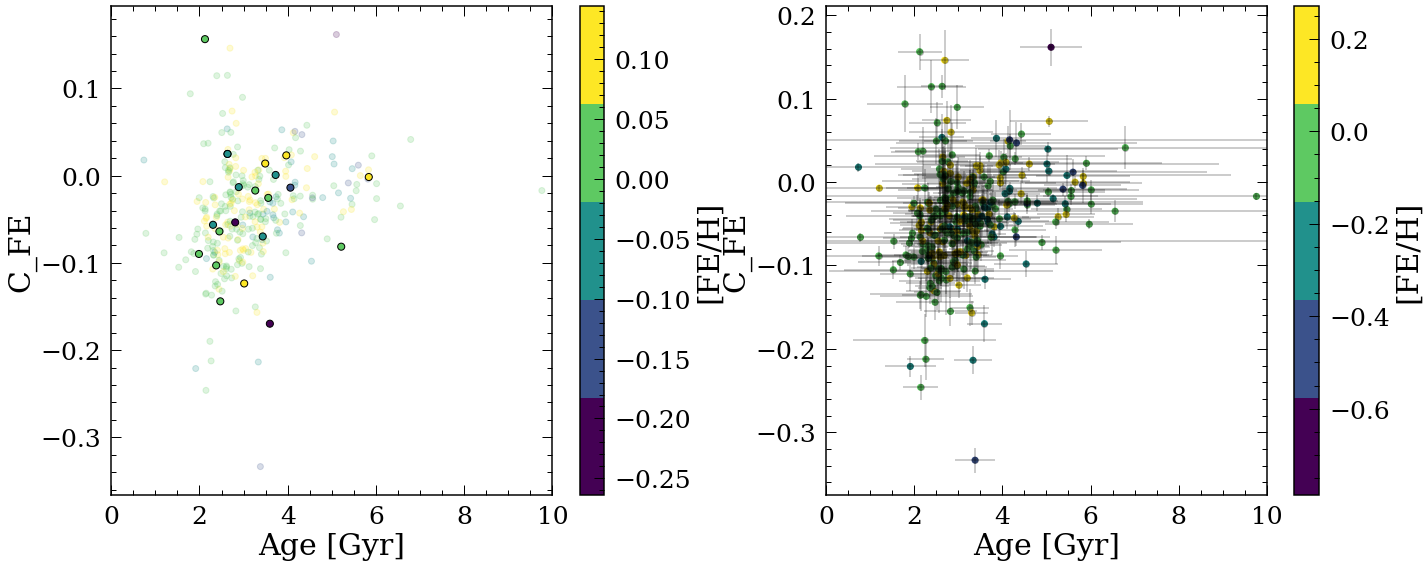

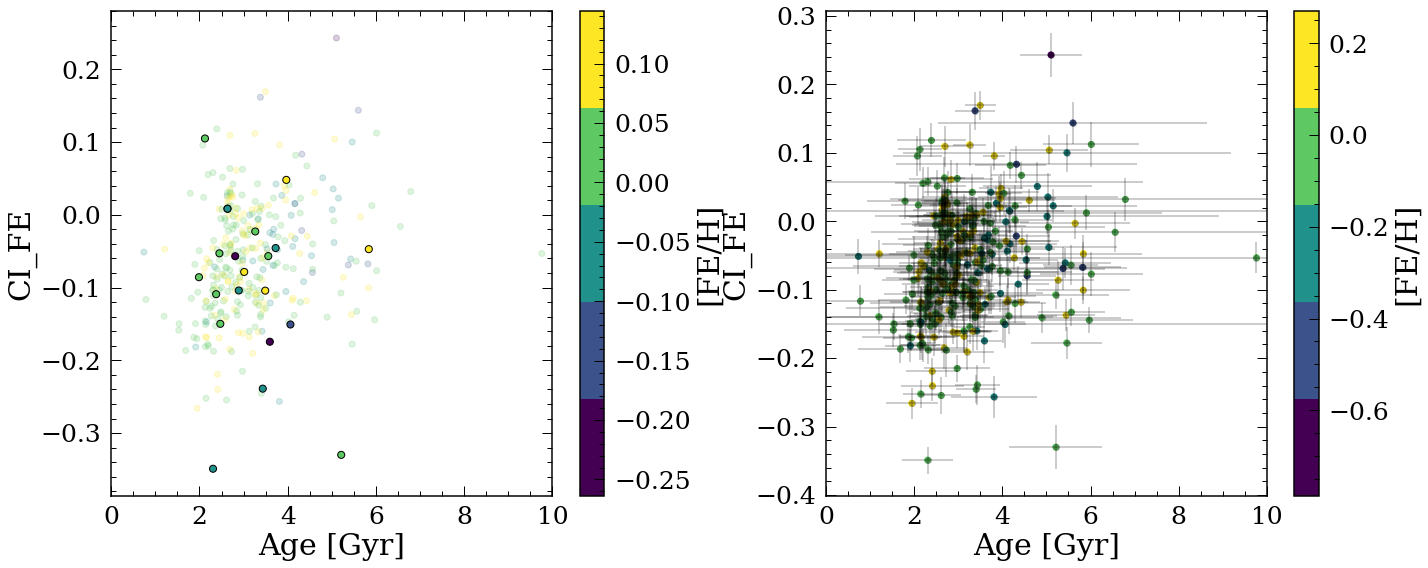

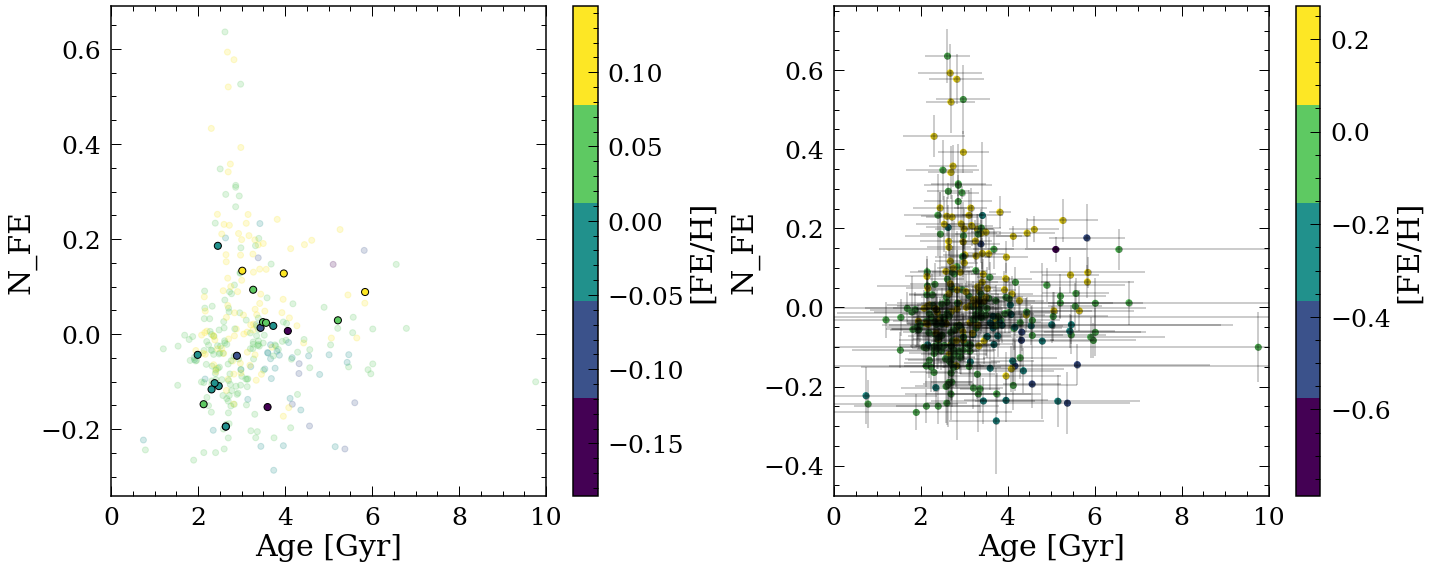

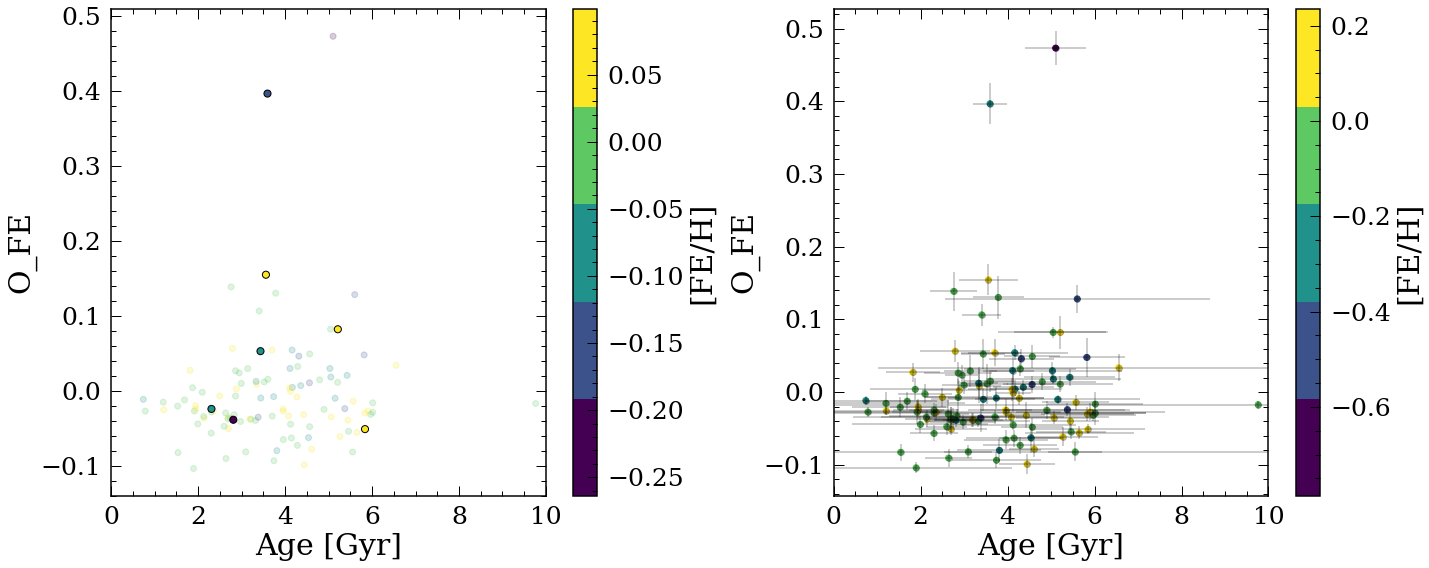

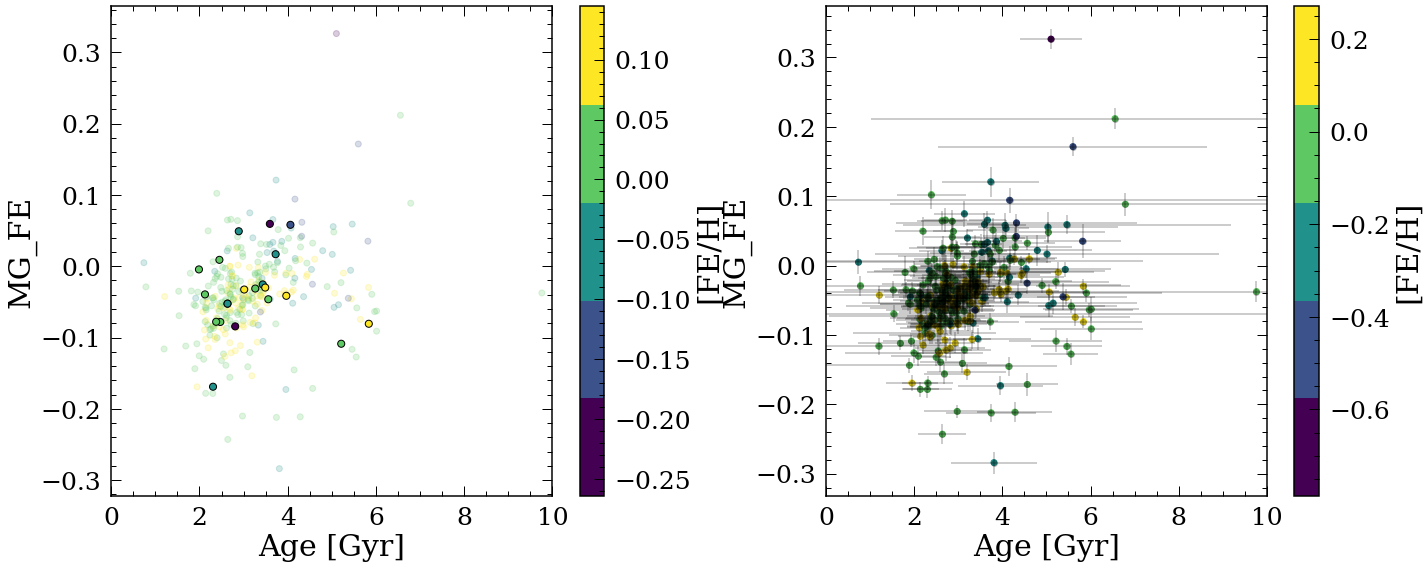

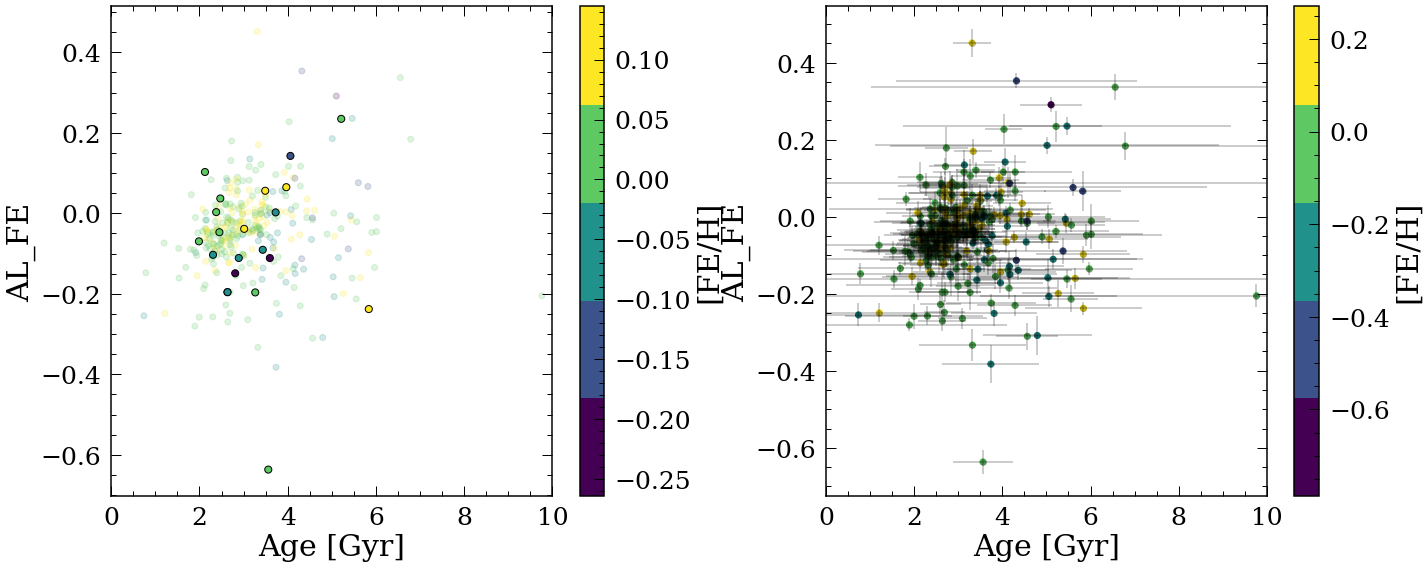

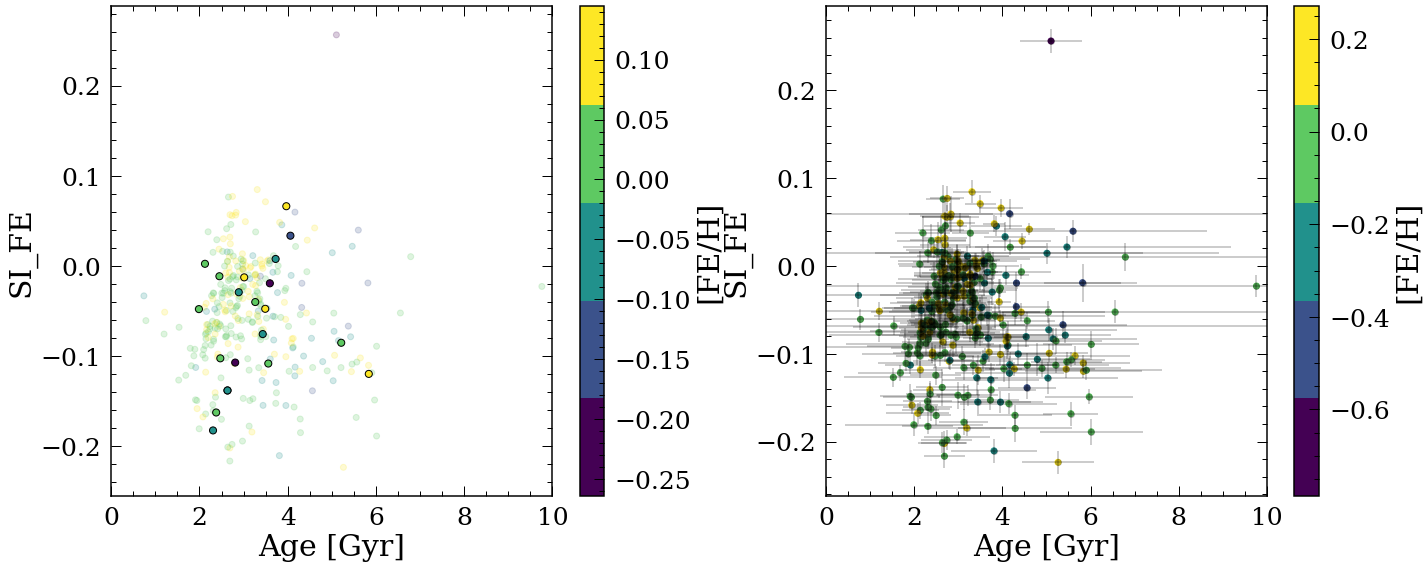

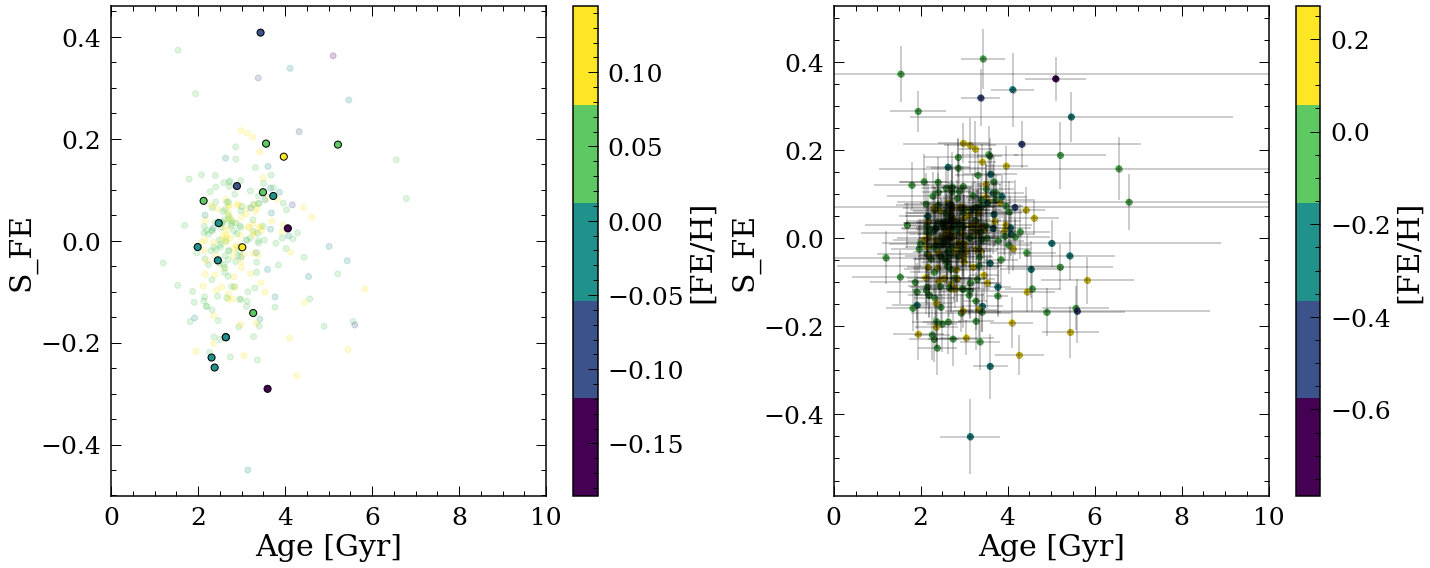

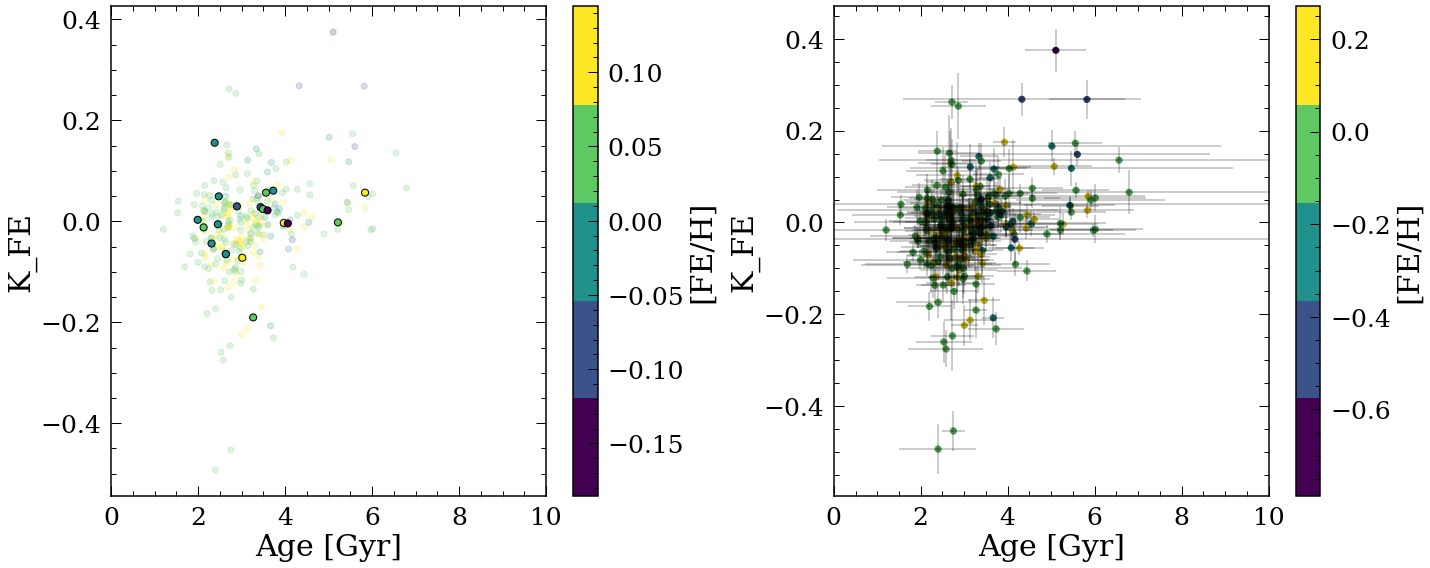

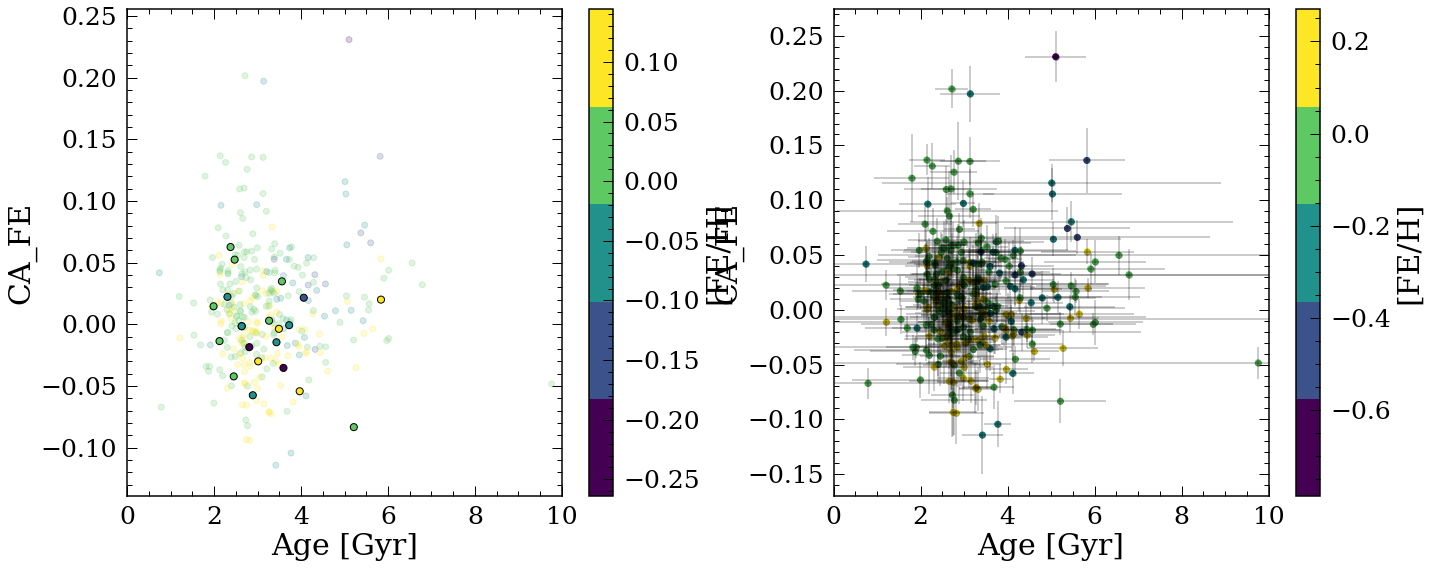

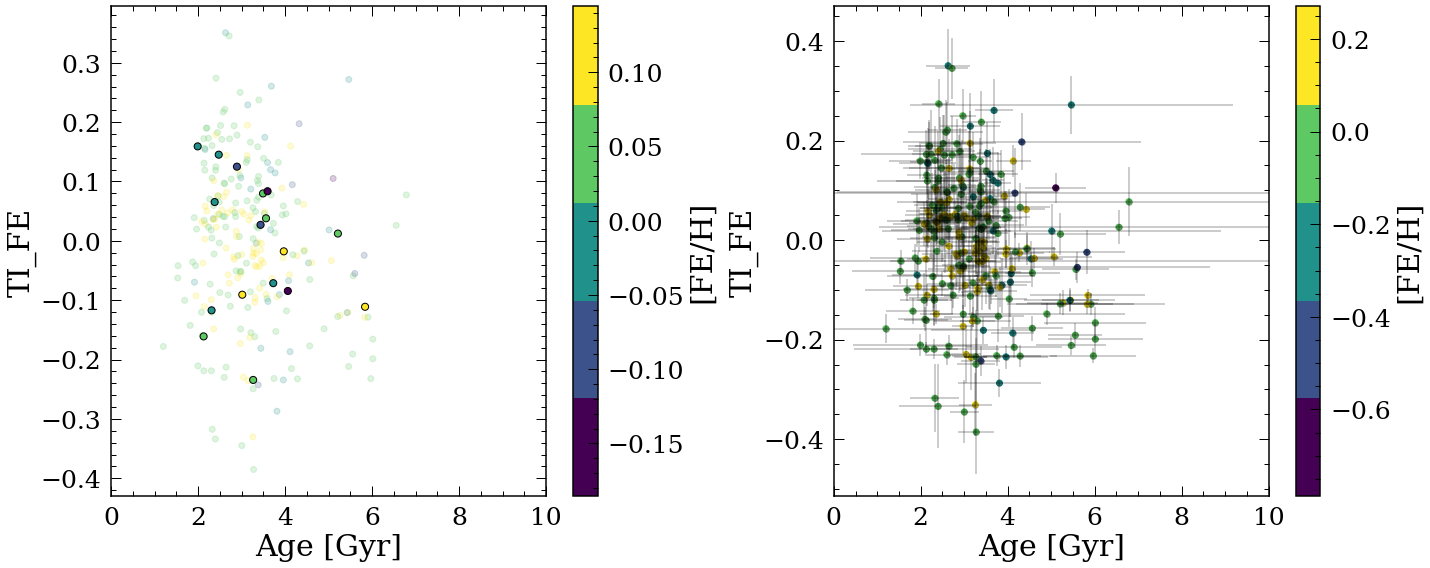

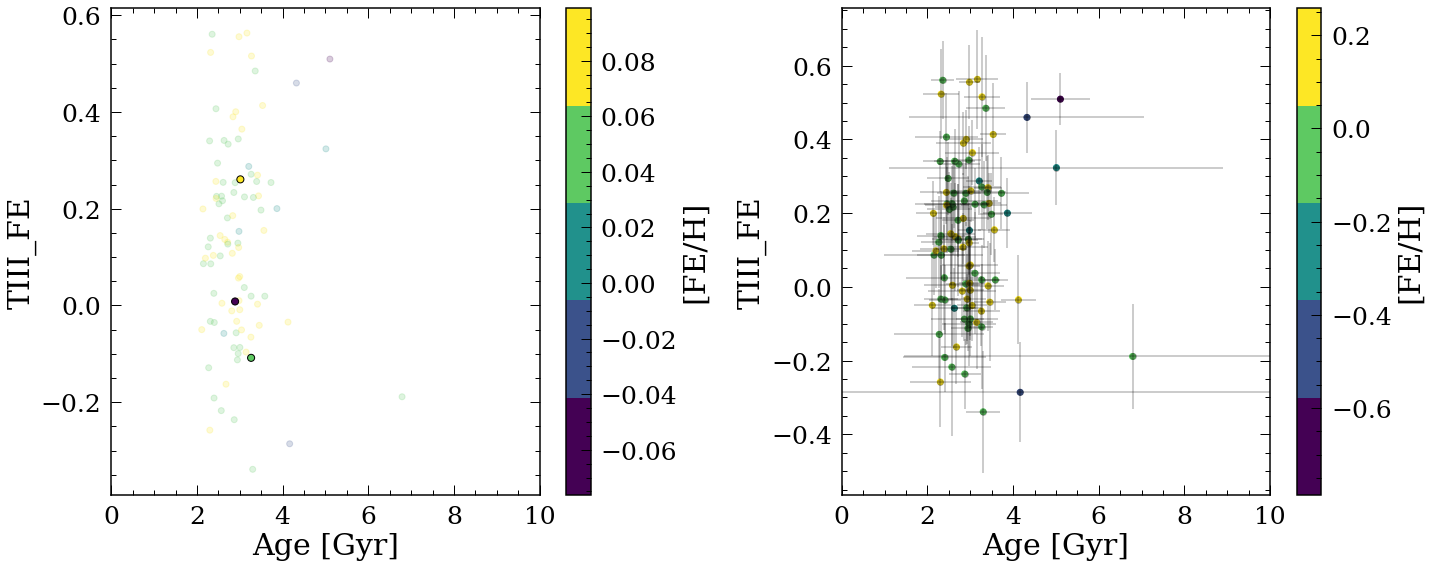

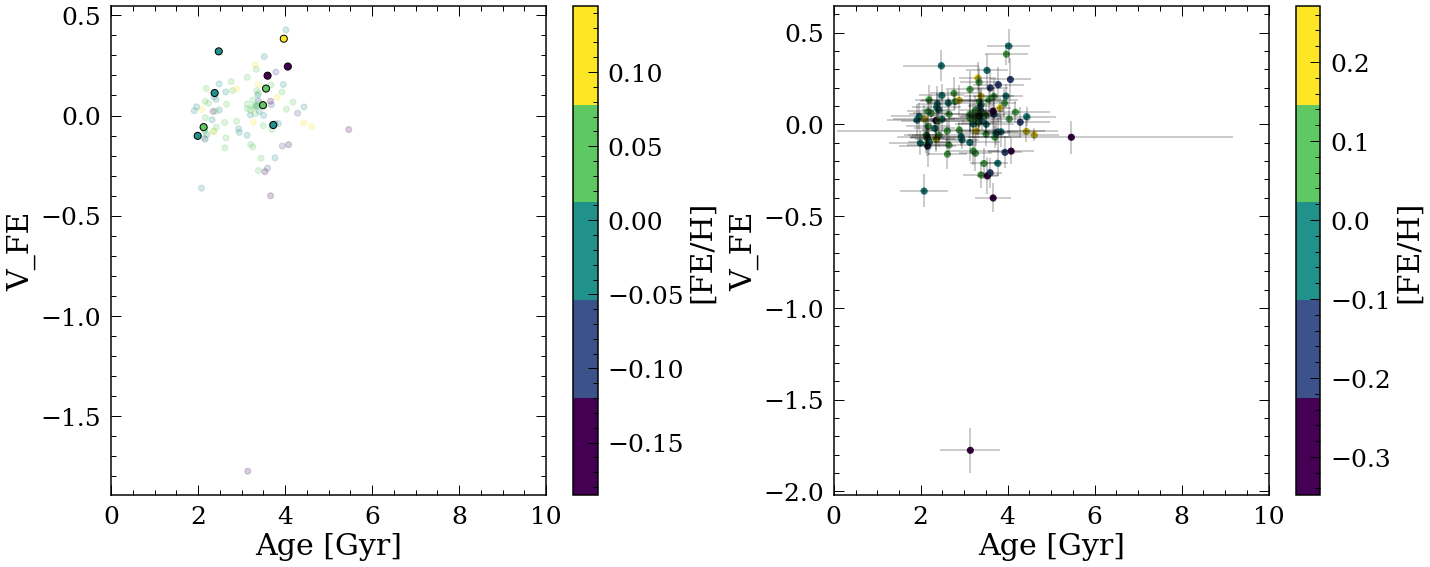

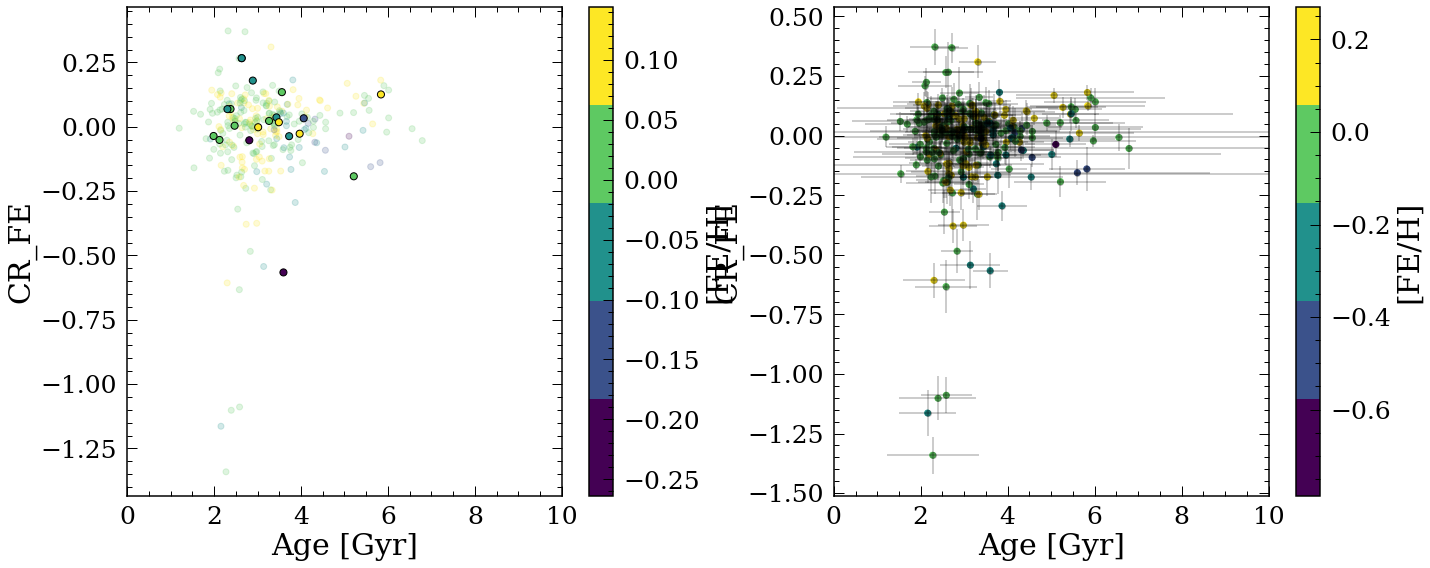

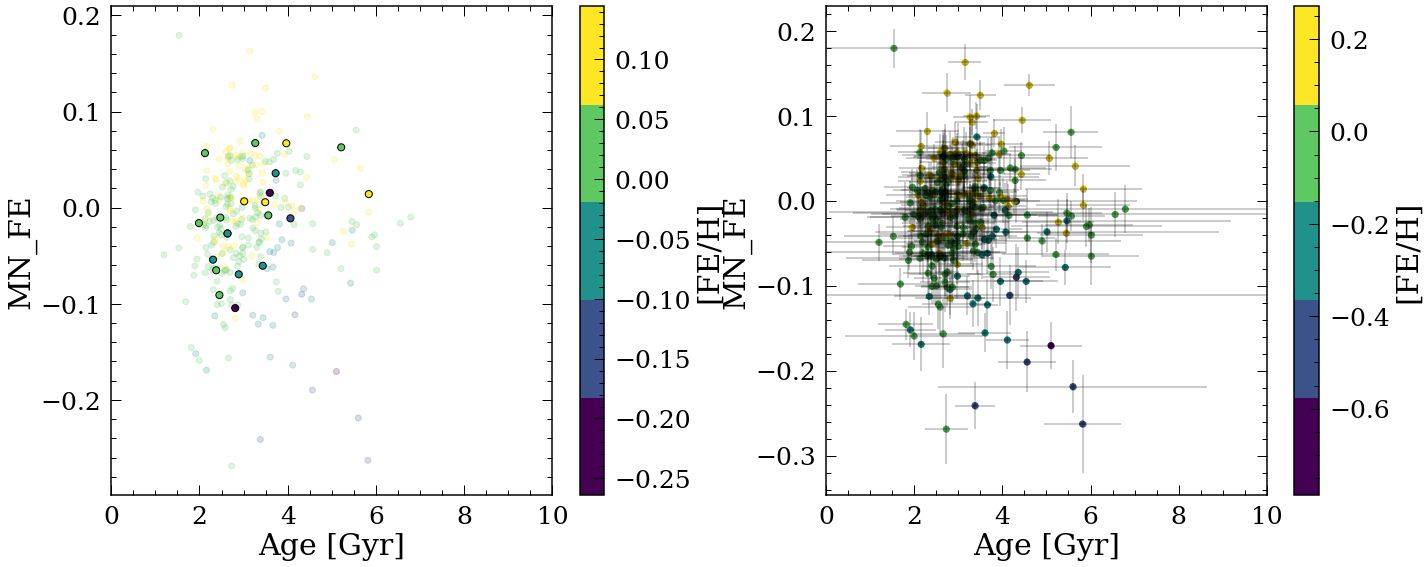

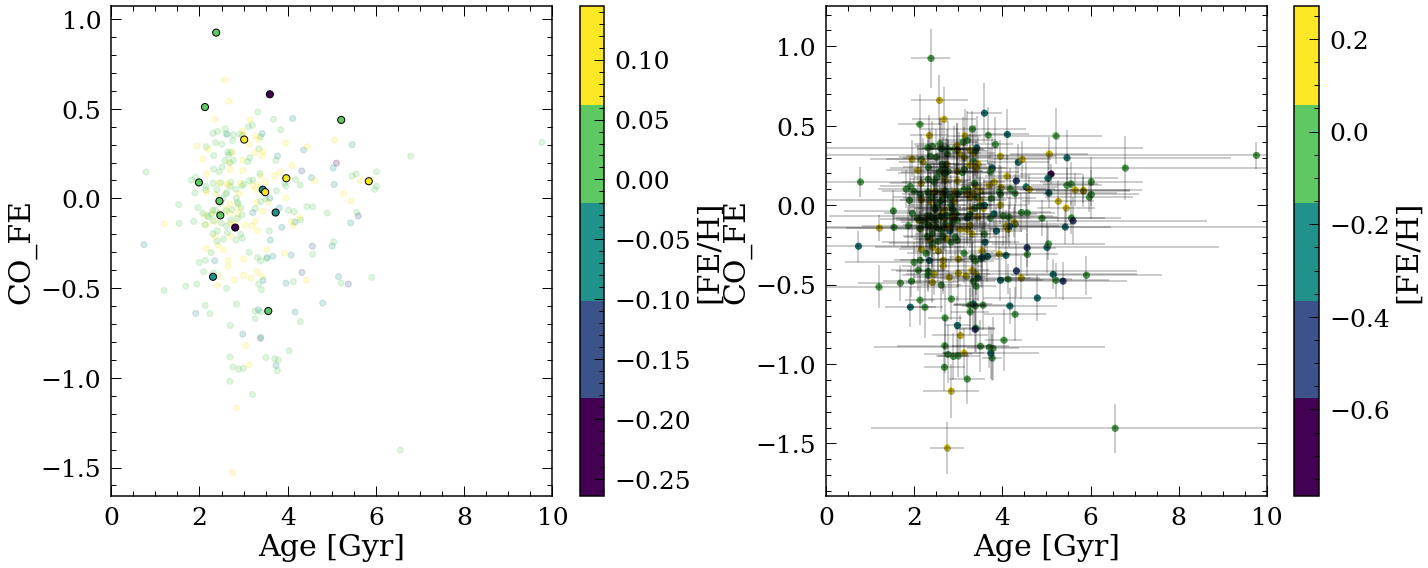

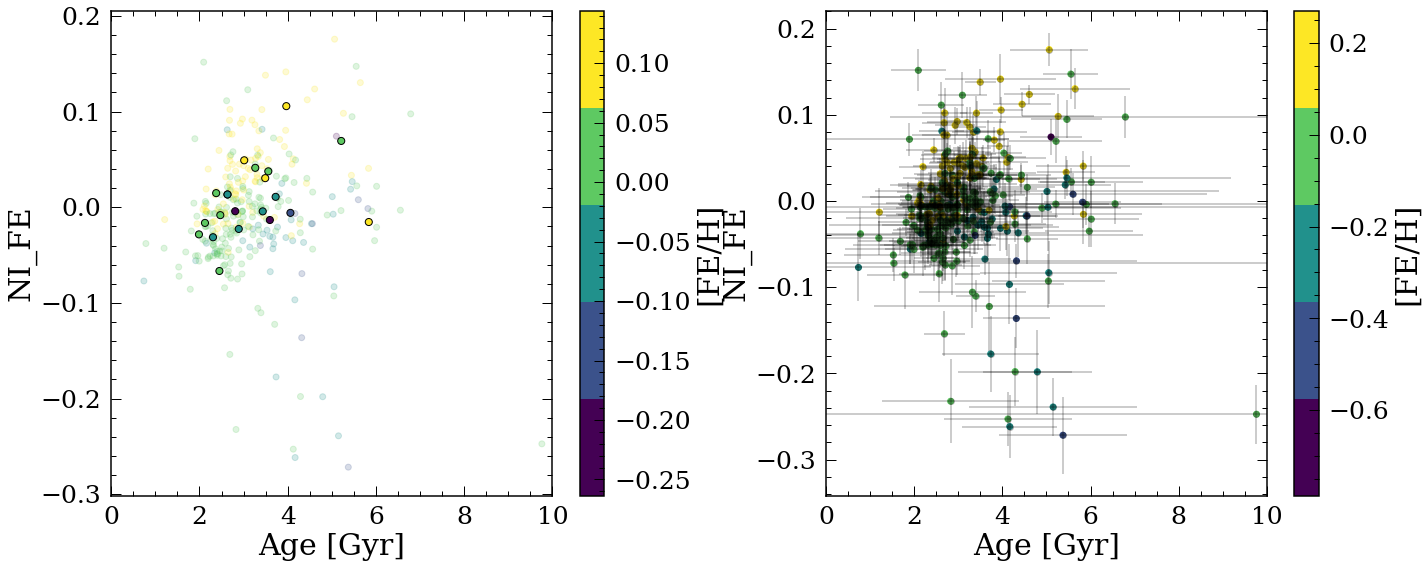

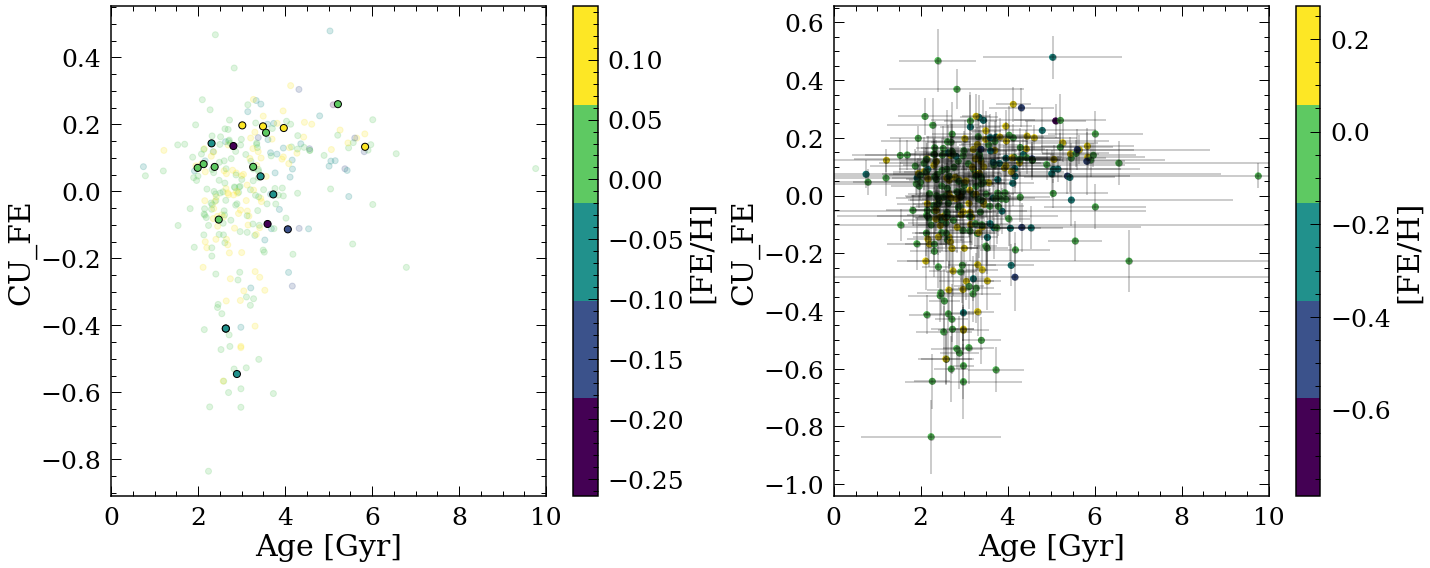

In [31]:
cm = plt.cm.get_cmap('viridis',5)
for i in range(len(cols)):
    checkabd=cols[i]
    df_plot=df_bin_MS.loc[df_bin_MS[checkabd]>-100]
    df_plot_KOI=df_NN_MS_KOI.loc[df_NN_MS_KOI[checkabd]>-100]
    if len(df_plot)>10:
        plt.figure(figsize=(20,8))
        plt.subplot(1,2,1)
        plt.scatter(df_plot['age_MAD'],df_plot[checkabd],c=df_plot['FE_H'],cmap=cm,alpha=0.2)
        plt.scatter(df_plot_KOI['age_MAD'],df_plot_KOI[checkabd],c=df_plot_KOI['FE_H'],cmap=cm,s=50,edgecolor='k')
        plt.ylabel(checkabd)
        plt.xlim([0,10])
        plt.xlabel('Age [Gyr]')
        cb=plt.colorbar()
        cb.set_label('[FE/H]')
        
        plt.subplot(1,2,2)
        plt.errorbar(df_plot['age_MAD'],df_plot[checkabd],
                 yerr=df_plot[checkabd+"_ERR"],xerr=df_plot["age_MAD_err"],fmt='ko',alpha=0.2)
        plt.scatter(df_plot['age_MAD'],df_plot[checkabd],c=df_plot['FE_H'],cmap=cm)
        plt.ylabel(checkabd)
        plt.xlim([0,10])
        plt.xlabel('Age [Gyr]')
        cb=plt.colorbar()
        cb.set_label('[FE/H]')
        
        plt.tight_layout()
        #plt.savefig('NewData/Abund/'+checkabd+'_MS.png')
        #plt.xlim([-0.5,0.5])